# Regularization Techniques

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, accuracy_score
from tensorflow.keras.models import load_model
from pathlib import Path

import sys
module_path = os.path.abspath(os.getcwd() + '\\..')
if module_path not in sys.path:
    sys.path.append(module_path)
from src.data.load_dataset import load_dataset, load_fusioned_dataset
from src.lib.time_series_augmentation.utils.augmentation import jitter, rotation
from src.models.CNNLSTM import CNNLSTM
from src.models.RCNN import RCNN

In [2]:
kf = KFold(n_splits=10, shuffle=True, random_state=48)
epochs = 100
cnn_auc = []
rnn_auc = []

In [3]:
model_path = Path(os.path.abspath('')).parent / 'models' / 'saved'

## 1. Unimodal Body Modality (Skeleton)

In [4]:
X_train, X_test, y_train, y_test = load_dataset('skeleton', binary=True)
X = X_train.copy()
y = y_train.copy()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

n_length, n_features, n_outputs = X_train.shape[2], X_train.shape[-1], y_train.shape[1]

(783, 1, 350, 35) (783, 1)
(274, 1, 350, 35) (274, 1)


In [52]:
jitter_X = jitter(X, sigma=0.03)

In [53]:
reshaped_X = X.reshape((X.shape[0], X.shape[2], X.shape[-1]))
rotated_X = rotation(reshaped_X)
rotated_X = rotated_X.reshape((rotated_X.shape[0], 1, rotated_X.shape[1], rotated_X.shape[-1]))

In [54]:
augmented_X = np.concatenate((rotated_X, jitter_X), axis=0)
add_y = np.concatenate((y, y), axis=0)
full_X = np.concatenate((augmented_X, X), axis=0)
full_y = np.concatenate((add_y, y), axis=0)
full_X.shape

(2436, 1, 350, 35)

### 1.2 CNN + BiLSTM

Epoch 1/100
22/22 - 21s - loss: 0.6775 - accuracy: 0.5866 - auc: 0.6358 - precision: 0.5740 - recall: 0.5588 - f1_score: 0.6513 - val_loss: 0.6966 - val_accuracy: 0.5063 - val_auc: 0.5308 - val_precision: 0.6667 - val_recall: 0.0500 - val_f1_score: 0.6723 - 21s/epoch - 933ms/step
Epoch 2/100
22/22 - 2s - loss: 0.6101 - accuracy: 0.6875 - auc: 0.7312 - precision: 0.6840 - recall: 0.6559 - f1_score: 0.6513 - val_loss: 0.6716 - val_accuracy: 0.5949 - val_auc: 0.6869 - val_precision: 0.9000 - val_recall: 0.2250 - val_f1_score: 0.6723 - 2s/epoch - 70ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5801 - accuracy: 0.7003 - auc: 0.7646 - precision: 0.6891 - recall: 0.6912 - f1_score: 0.6513 - val_loss: 0.6519 - val_accuracy: 0.6203 - val_auc: 0.6769 - val_precision: 0.5862 - val_recall: 0.8500 - val_f1_score: 0.6723 - 1s/epoch - 67ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5356 - accuracy: 0.7102 - auc: 0.8030 - precision: 0.6921 - recall: 0.7206 - f1_score: 0.6513 - val_loss: 0.6808 - val_accuracy: 0

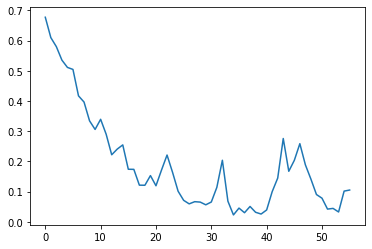

Epoch 1/100
22/22 - 5s - loss: 0.7136 - accuracy: 0.5852 - auc_1: 0.6092 - precision_1: 0.5800 - recall_1: 0.5118 - f1_score: 0.6513 - val_loss: 0.6673 - val_accuracy: 0.5949 - val_auc_1: 0.7032 - val_precision_1: 0.6667 - val_recall_1: 0.4000 - val_f1_score: 0.6723 - 5s/epoch - 241ms/step
Epoch 2/100
22/22 - 2s - loss: 0.6239 - accuracy: 0.6548 - auc_1: 0.7050 - precision_1: 0.6590 - recall_1: 0.5912 - f1_score: 0.6513 - val_loss: 0.6144 - val_accuracy: 0.6582 - val_auc_1: 0.7712 - val_precision_1: 0.7826 - val_recall_1: 0.4500 - val_f1_score: 0.6723 - 2s/epoch - 68ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5943 - accuracy: 0.6719 - auc_1: 0.7386 - precision_1: 0.6657 - recall_1: 0.6441 - f1_score: 0.6513 - val_loss: 0.6728 - val_accuracy: 0.5949 - val_auc_1: 0.7388 - val_precision_1: 0.9000 - val_recall_1: 0.2250 - val_f1_score: 0.6723 - 1s/epoch - 59ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5676 - accuracy: 0.6946 - auc_1: 0.7716 - precision_1: 0.6822 - recall_1: 0.6882 - f1_score: 0.6

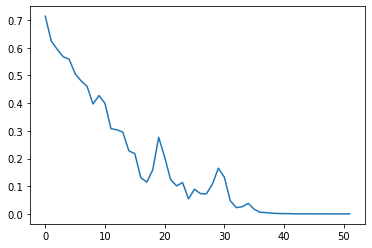

Epoch 1/100
22/22 - 5s - loss: 0.7145 - accuracy: 0.5824 - auc_2: 0.6053 - precision_2: 0.5660 - recall_2: 0.4910 - f1_score: 0.6409 - val_loss: 0.6878 - val_accuracy: 0.5823 - val_auc_2: 0.6761 - val_precision_2: 0.8571 - val_recall_2: 0.3750 - val_f1_score: 0.7559 - 5s/epoch - 243ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6184 - accuracy: 0.6520 - auc_2: 0.7139 - precision_2: 0.6372 - recall_2: 0.6084 - f1_score: 0.6409 - val_loss: 0.7730 - val_accuracy: 0.4051 - val_auc_2: 0.7033 - val_precision_2: 1.0000 - val_recall_2: 0.0208 - val_f1_score: 0.7559 - 1s/epoch - 58ms/step
Epoch 3/100
22/22 - 2s - loss: 0.5765 - accuracy: 0.7003 - auc_2: 0.7681 - precision_2: 0.7138 - recall_2: 0.6084 - f1_score: 0.6409 - val_loss: 0.6294 - val_accuracy: 0.7089 - val_auc_2: 0.7597 - val_precision_2: 0.8788 - val_recall_2: 0.6042 - val_f1_score: 0.7559 - 2s/epoch - 68ms/step
Epoch 4/100
22/22 - 2s - loss: 0.5482 - accuracy: 0.7088 - auc_2: 0.7944 - precision_2: 0.7068 - recall_2: 0.6536 - f1_score: 0.6

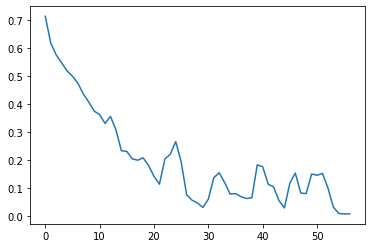

Epoch 1/100
23/23 - 6s - loss: 0.7079 - accuracy: 0.5830 - auc_3: 0.5964 - precision_3: 0.5772 - recall_3: 0.5436 - f1_score: 0.6559 - val_loss: 0.7081 - val_accuracy: 0.4615 - val_auc_3: 0.5605 - val_precision_3: 0.4615 - val_recall_3: 1.0000 - val_f1_score: 0.6316 - 6s/epoch - 243ms/step
Epoch 2/100
23/23 - 1s - loss: 0.6300 - accuracy: 0.6298 - auc_3: 0.6993 - precision_3: 0.6040 - recall_3: 0.7006 - f1_score: 0.6559 - val_loss: 0.8731 - val_accuracy: 0.5385 - val_auc_3: 0.6438 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00 - val_f1_score: 0.6316 - 1s/epoch - 57ms/step
Epoch 3/100
23/23 - 2s - loss: 0.6162 - accuracy: 0.6766 - auc_3: 0.7307 - precision_3: 0.6835 - recall_3: 0.6279 - f1_score: 0.6559 - val_loss: 0.6822 - val_accuracy: 0.5385 - val_auc_3: 0.6663 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00 - val_f1_score: 0.6316 - 2s/epoch - 67ms/step
Epoch 4/100
23/23 - 1s - loss: 0.6198 - accuracy: 0.6539 - auc_3: 0.7345 - precision_3: 0.6894 - recall_3: 0.5291

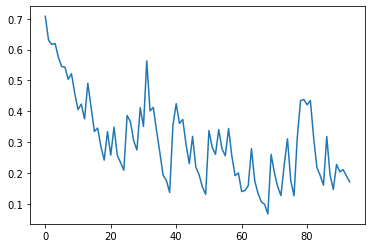

Epoch 1/100
23/23 - 6s - loss: 0.7192 - accuracy: 0.5887 - auc_4: 0.6043 - precision_4: 0.5867 - recall_4: 0.5800 - f1_score: 0.6635 - val_loss: 0.6550 - val_accuracy: 0.6154 - val_auc_4: 0.6139 - val_precision_4: 0.0000e+00 - val_recall_4: 0.0000e+00 - val_f1_score: 0.5556 - 6s/epoch - 259ms/step
Epoch 2/100
23/23 - 1s - loss: 0.6093 - accuracy: 0.6624 - auc_4: 0.7338 - precision_4: 0.6867 - recall_4: 0.5886 - f1_score: 0.6635 - val_loss: 1.2047 - val_accuracy: 0.3846 - val_auc_4: 0.6385 - val_precision_4: 0.3846 - val_recall_4: 1.0000 - val_f1_score: 0.5556 - 1s/epoch - 58ms/step
Epoch 3/100
23/23 - 1s - loss: 0.6184 - accuracy: 0.6582 - auc_4: 0.7168 - precision_4: 0.6453 - recall_4: 0.6914 - f1_score: 0.6635 - val_loss: 0.6943 - val_accuracy: 0.6026 - val_auc_4: 0.6649 - val_precision_4: 0.0000e+00 - val_recall_4: 0.0000e+00 - val_f1_score: 0.5556 - 1s/epoch - 57ms/step
Epoch 4/100
23/23 - 1s - loss: 0.5836 - accuracy: 0.6922 - auc_4: 0.7591 - precision_4: 0.7098 - recall_4: 0.6429

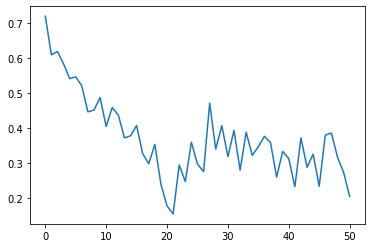

Epoch 1/100
23/23 - 6s - loss: 0.7321 - accuracy: 0.5631 - auc_5: 0.5987 - precision_5: 0.5586 - recall_5: 0.5231 - f1_score: 0.6584 - val_loss: 0.8787 - val_accuracy: 0.4359 - val_auc_5: 0.5739 - val_precision_5: 0.4359 - val_recall_5: 1.0000 - val_f1_score: 0.6071 - 6s/epoch - 248ms/step
Epoch 2/100
23/23 - 2s - loss: 0.6350 - accuracy: 0.6340 - auc_5: 0.6968 - precision_5: 0.6264 - recall_5: 0.6301 - f1_score: 0.6584 - val_loss: 0.6430 - val_accuracy: 0.6282 - val_auc_5: 0.7039 - val_precision_5: 0.7778 - val_recall_5: 0.2059 - val_f1_score: 0.6071 - 2s/epoch - 67ms/step
Epoch 3/100
23/23 - 2s - loss: 0.5944 - accuracy: 0.6965 - auc_5: 0.7512 - precision_5: 0.7063 - recall_5: 0.6532 - f1_score: 0.6584 - val_loss: 0.6410 - val_accuracy: 0.6282 - val_auc_5: 0.6892 - val_precision_5: 0.5581 - val_recall_5: 0.7059 - val_f1_score: 0.6071 - 2s/epoch - 67ms/step
Epoch 4/100
23/23 - 2s - loss: 0.5742 - accuracy: 0.7007 - auc_5: 0.7686 - precision_5: 0.7015 - recall_5: 0.6792 - f1_score: 0.6

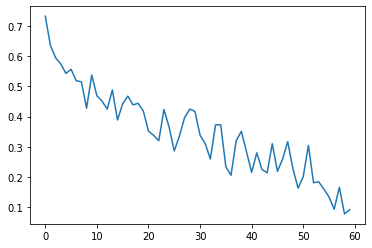

Epoch 1/100
23/23 - 6s - loss: 0.7225 - accuracy: 0.5716 - auc_6: 0.5779 - precision_6: 0.5695 - recall_6: 0.4898 - f1_score: 0.6546 - val_loss: 0.7650 - val_accuracy: 0.4744 - val_auc_6: 0.5778 - val_precision_6: 0.4744 - val_recall_6: 1.0000 - val_f1_score: 0.6435 - 6s/epoch - 249ms/step
Epoch 2/100
23/23 - 2s - loss: 0.6325 - accuracy: 0.6355 - auc_6: 0.6948 - precision_6: 0.6132 - recall_6: 0.6793 - f1_score: 0.6546 - val_loss: 0.7402 - val_accuracy: 0.5256 - val_auc_6: 0.6829 - val_precision_6: 0.0000e+00 - val_recall_6: 0.0000e+00 - val_f1_score: 0.6435 - 2s/epoch - 67ms/step
Epoch 3/100
23/23 - 1s - loss: 0.5992 - accuracy: 0.6667 - auc_6: 0.7412 - precision_6: 0.6731 - recall_6: 0.6122 - f1_score: 0.6546 - val_loss: 0.9874 - val_accuracy: 0.4744 - val_auc_6: 0.6061 - val_precision_6: 0.4744 - val_recall_6: 1.0000 - val_f1_score: 0.6435 - 1s/epoch - 57ms/step
Epoch 4/100
23/23 - 1s - loss: 0.5911 - accuracy: 0.6695 - auc_6: 0.7453 - precision_6: 0.6536 - recall_6: 0.6822 - f1_sc

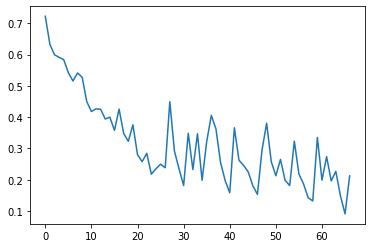

Epoch 1/100
23/23 - 6s - loss: 0.7257 - accuracy: 0.5972 - auc_7: 0.6032 - precision_7: 0.6098 - recall_7: 0.4438 - f1_score: 0.6481 - val_loss: 0.7329 - val_accuracy: 0.5385 - val_auc_7: 0.6085 - val_precision_7: 0.5385 - val_recall_7: 1.0000 - val_f1_score: 0.7000 - 6s/epoch - 242ms/step
Epoch 2/100
23/23 - 2s - loss: 0.6275 - accuracy: 0.6610 - auc_7: 0.7044 - precision_7: 0.6443 - recall_7: 0.6538 - f1_score: 0.6481 - val_loss: 0.6771 - val_accuracy: 0.5641 - val_auc_7: 0.6048 - val_precision_7: 0.5606 - val_recall_7: 0.8810 - val_f1_score: 0.7000 - 2s/epoch - 67ms/step
Epoch 3/100
23/23 - 1s - loss: 0.6010 - accuracy: 0.6723 - auc_7: 0.7391 - precision_7: 0.6466 - recall_7: 0.6982 - f1_score: 0.6481 - val_loss: 0.8392 - val_accuracy: 0.4615 - val_auc_7: 0.6892 - val_precision_7: 0.0000e+00 - val_recall_7: 0.0000e+00 - val_f1_score: 0.7000 - 1s/epoch - 58ms/step
Epoch 4/100
23/23 - 1s - loss: 0.5852 - accuracy: 0.6879 - auc_7: 0.7546 - precision_7: 0.6980 - recall_7: 0.6154 - f1_sc

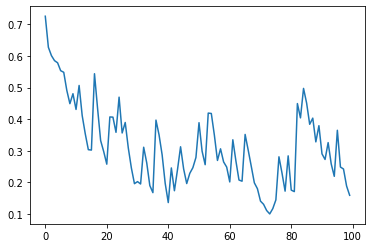

Epoch 1/100
23/23 - 6s - loss: 0.6964 - accuracy: 0.5787 - auc_8: 0.6037 - precision_8: 0.5682 - recall_8: 0.5162 - f1_score: 0.6494 - val_loss: 0.7492 - val_accuracy: 0.4744 - val_auc_8: 0.6579 - val_precision_8: 0.0000e+00 - val_recall_8: 0.0000e+00 - val_f1_score: 0.6891 - 6s/epoch - 256ms/step
Epoch 2/100
23/23 - 1s - loss: 0.6097 - accuracy: 0.6624 - auc_8: 0.7290 - precision_8: 0.7149 - recall_8: 0.4956 - f1_score: 0.6494 - val_loss: 0.8352 - val_accuracy: 0.4872 - val_auc_8: 0.6539 - val_precision_8: 1.0000 - val_recall_8: 0.0244 - val_f1_score: 0.6891 - 1s/epoch - 58ms/step
Epoch 3/100
23/23 - 2s - loss: 0.5908 - accuracy: 0.6908 - auc_8: 0.7551 - precision_8: 0.7079 - recall_8: 0.6077 - f1_score: 0.6494 - val_loss: 0.7012 - val_accuracy: 0.5128 - val_auc_8: 0.6628 - val_precision_8: 0.6000 - val_recall_8: 0.2195 - val_f1_score: 0.6891 - 2s/epoch - 67ms/step
Epoch 4/100
23/23 - 1s - loss: 0.5451 - accuracy: 0.7177 - auc_8: 0.7968 - precision_8: 0.7134 - recall_8: 0.6903 - f1_sc

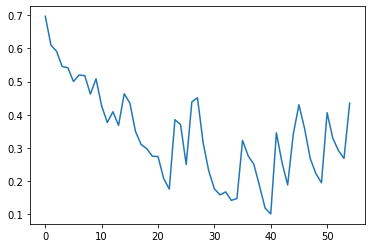

Epoch 1/100
23/23 - 6s - loss: 0.6954 - accuracy: 0.6113 - auc_9: 0.6444 - precision_9: 0.6121 - recall_9: 0.5805 - f1_score: 0.6610 - val_loss: 0.6598 - val_accuracy: 0.5897 - val_auc_9: 0.6824 - val_precision_9: 0.0000e+00 - val_recall_9: 0.0000e+00 - val_f1_score: 0.5818 - 6s/epoch - 249ms/step
Epoch 2/100
23/23 - 1s - loss: 0.6171 - accuracy: 0.6553 - auc_9: 0.7211 - precision_9: 0.6577 - recall_9: 0.6293 - f1_score: 0.6610 - val_loss: 0.7347 - val_accuracy: 0.5128 - val_auc_9: 0.6654 - val_precision_9: 0.4559 - val_recall_9: 0.9688 - val_f1_score: 0.5818 - 1s/epoch - 57ms/step
Epoch 3/100
23/23 - 1s - loss: 0.5887 - accuracy: 0.6908 - auc_9: 0.7528 - precision_9: 0.6879 - recall_9: 0.6839 - f1_score: 0.6610 - val_loss: 0.7088 - val_accuracy: 0.5641 - val_auc_9: 0.7075 - val_precision_9: 0.4821 - val_recall_9: 0.8438 - val_f1_score: 0.5818 - 1s/epoch - 58ms/step
Epoch 4/100
23/23 - 1s - loss: 0.5760 - accuracy: 0.6965 - auc_9: 0.7661 - precision_9: 0.6971 - recall_9: 0.6810 - f1_sc

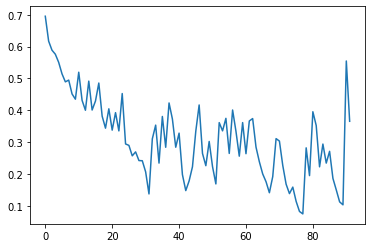

In [6]:
acc = 0.0
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    cnnlstm_binary_body_model = CNNLSTM(n_features, None, n_length, n_outputs)
    history = cnnlstm_binary_body_model.train(X_train, y_train, X_val, y_val, epochs=epochs, batch_size=32)
    plt.plot(history.history['loss'])
    plt.show()
    if history.history['accuracy'][-1] > acc:
        acc = history.history['accuracy'][-1]
        cnnlstm_binary_body_model.save(model_path / 'body_binary_cnnlstm.h5')

#### Predictions on the holdout set

In [7]:
cnnlstm_binary_body_model = load_model(model_path / 'body_binary_cnnlstm.h5')
y_pred = cnnlstm_binary_body_model.predict(X_test)
_, acc, auc, precision, recall, f1 = cnnlstm_binary_body_model.evaluate(X_test, y_test)
cnn_auc.append(round(auc, 2))
print('Accuracy: {:.2f}% \nROC/AUC: {:.2f} \nPrecision: {:.2f} \nRecall: {:.2f} \nF1 score: {:.2f}'.format(acc * 100, auc, precision, recall, f1))

9/9 [==============================] - 1s 15ms/step - loss: 0.8256 - accuracy: 0.4197 - auc_1: 0.7014 - precision_1: 0.9750 - recall_1: 0.3319 - f1_score: 0.9234
Accuracy: 41.97% 
ROC/AUC: 0.70 
Precision: 0.98 
Recall: 0.33 
F1 score: 0.92


### 1.2 RCNN

Epoch 1/100
88/88 - 3s - loss: 0.7650 - accuracy: 0.5570 - auc_90: 0.5664 - precision_90: 0.5610 - recall_90: 0.5867 - f1_score: 0.6735 - val_loss: 0.7278 - val_accuracy: 0.6025 - val_auc_90: 0.6068 - val_precision_90: 0.6164 - val_recall_90: 0.3947 - val_f1_score: 0.6369 - 3s/epoch - 29ms/step
Epoch 2/100
88/88 - 1s - loss: 0.6803 - accuracy: 0.6026 - auc_90: 0.6350 - precision_90: 0.6094 - recall_90: 0.6056 - f1_score: 0.6735 - val_loss: 0.7594 - val_accuracy: 0.5328 - val_auc_90: 0.5883 - val_precision_90: 0.5000 - val_recall_90: 0.7105 - val_f1_score: 0.6369 - 1s/epoch - 13ms/step
Epoch 3/100
88/88 - 1s - loss: 0.6735 - accuracy: 0.6058 - auc_90: 0.6476 - precision_90: 0.6121 - recall_90: 0.6110 - f1_score: 0.6735 - val_loss: 0.7417 - val_accuracy: 0.5820 - val_auc_90: 0.6446 - val_precision_90: 0.5326 - val_recall_90: 0.8596 - val_f1_score: 0.6369 - 1s/epoch - 13ms/step
Epoch 4/100
88/88 - 1s - loss: 0.6757 - accuracy: 0.6255 - auc_90: 0.6562 - precision_90: 0.6278 - recall_90: 0.

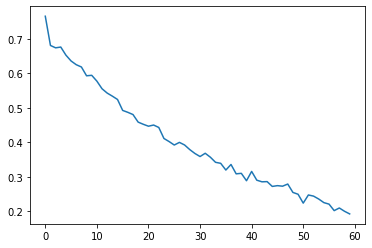

Epoch 1/100
88/88 - 3s - loss: 0.7441 - accuracy: 0.5611 - auc_91: 0.5777 - precision_91: 0.5608 - recall_91: 0.5751 - f1_score: 0.6679 - val_loss: 0.8406 - val_accuracy: 0.5287 - val_auc_91: 0.5567 - val_precision_91: 0.5481 - val_recall_91: 0.5781 - val_f1_score: 0.6882 - 3s/epoch - 31ms/step
Epoch 2/100
88/88 - 1s - loss: 0.6951 - accuracy: 0.5935 - auc_91: 0.6123 - precision_91: 0.5961 - recall_91: 0.5869 - f1_score: 0.6679 - val_loss: 0.7146 - val_accuracy: 0.5779 - val_auc_91: 0.6180 - val_precision_91: 0.5635 - val_recall_91: 0.8672 - val_f1_score: 0.6882 - 1s/epoch - 13ms/step
Epoch 3/100
88/88 - 1s - loss: 0.6952 - accuracy: 0.5935 - auc_91: 0.6283 - precision_91: 0.5951 - recall_91: 0.5924 - f1_score: 0.6679 - val_loss: 0.6882 - val_accuracy: 0.6107 - val_auc_91: 0.6204 - val_precision_91: 0.6093 - val_recall_91: 0.7188 - val_f1_score: 0.6882 - 1s/epoch - 13ms/step
Epoch 4/100
88/88 - 1s - loss: 0.6607 - accuracy: 0.6209 - auc_91: 0.6609 - precision_91: 0.6304 - recall_91: 0.

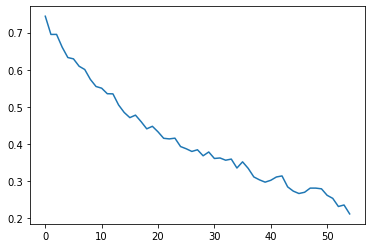

Epoch 1/100
88/88 - 3s - loss: 0.7756 - accuracy: 0.5365 - auc_92: 0.5470 - precision_92: 0.5421 - recall_92: 0.5771 - f1_score: 0.6747 - val_loss: 0.9522 - val_accuracy: 0.4467 - val_auc_92: 0.5387 - val_precision_92: 0.4348 - val_recall_92: 0.7207 - val_f1_score: 0.6254 - 3s/epoch - 29ms/step
Epoch 2/100
88/88 - 1s - loss: 0.6806 - accuracy: 0.6131 - auc_92: 0.6493 - precision_92: 0.6243 - recall_92: 0.6030 - f1_score: 0.6747 - val_loss: 0.7292 - val_accuracy: 0.5287 - val_auc_92: 0.6346 - val_precision_92: 0.4897 - val_recall_92: 0.8559 - val_f1_score: 0.6254 - 1s/epoch - 13ms/step
Epoch 3/100
88/88 - 1s - loss: 0.6575 - accuracy: 0.6218 - auc_92: 0.6629 - precision_92: 0.6285 - recall_92: 0.6290 - f1_score: 0.6747 - val_loss: 0.6864 - val_accuracy: 0.5492 - val_auc_92: 0.5939 - val_precision_92: 0.5056 - val_recall_92: 0.4054 - val_f1_score: 0.6254 - 1s/epoch - 13ms/step
Epoch 4/100
88/88 - 1s - loss: 0.6466 - accuracy: 0.6474 - auc_92: 0.6901 - precision_92: 0.6514 - recall_92: 0.

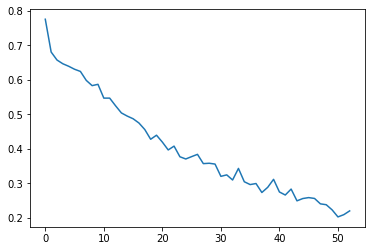

Epoch 1/100
88/88 - 3s - loss: 0.7494 - accuracy: 0.5584 - auc_93: 0.5647 - precision_93: 0.5665 - recall_93: 0.5645 - f1_score: 0.6747 - val_loss: 0.7193 - val_accuracy: 0.5123 - val_auc_93: 0.6276 - val_precision_93: 0.4794 - val_recall_93: 0.8378 - val_f1_score: 0.6254 - 3s/epoch - 29ms/step
Epoch 2/100
88/88 - 1s - loss: 0.6703 - accuracy: 0.6163 - auc_93: 0.6443 - precision_93: 0.6222 - recall_93: 0.6272 - f1_score: 0.6747 - val_loss: 0.6885 - val_accuracy: 0.5984 - val_auc_93: 0.6954 - val_precision_93: 0.5399 - val_recall_93: 0.7928 - val_f1_score: 0.6254 - 1s/epoch - 13ms/step
Epoch 3/100
88/88 - 1s - loss: 0.6870 - accuracy: 0.6113 - auc_93: 0.6368 - precision_93: 0.6146 - recall_93: 0.6344 - f1_score: 0.6747 - val_loss: 0.6834 - val_accuracy: 0.5984 - val_auc_93: 0.6327 - val_precision_93: 0.5765 - val_recall_93: 0.4414 - val_f1_score: 0.6254 - 1s/epoch - 13ms/step
Epoch 4/100
88/88 - 1s - loss: 0.6645 - accuracy: 0.6177 - auc_93: 0.6646 - precision_93: 0.6266 - recall_93: 0.

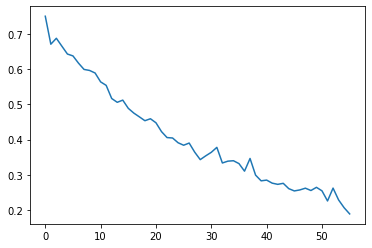

Epoch 1/100
88/88 - 3s - loss: 0.7416 - accuracy: 0.5543 - auc_94: 0.5720 - precision_94: 0.5530 - recall_94: 0.5706 - f1_score: 0.6671 - val_loss: 0.7139 - val_accuracy: 0.5902 - val_auc_94: 0.6058 - val_precision_94: 0.5852 - val_recall_94: 0.7923 - val_f1_score: 0.6952 - 3s/epoch - 28ms/step
Epoch 2/100
88/88 - 1s - loss: 0.6870 - accuracy: 0.6045 - auc_94: 0.6284 - precision_94: 0.6077 - recall_94: 0.5916 - f1_score: 0.6671 - val_loss: 0.6770 - val_accuracy: 0.5697 - val_auc_94: 0.6487 - val_precision_94: 0.5668 - val_recall_94: 0.8154 - val_f1_score: 0.6952 - 1s/epoch - 13ms/step
Epoch 3/100
88/88 - 1s - loss: 0.6661 - accuracy: 0.6300 - auc_94: 0.6590 - precision_94: 0.6310 - recall_94: 0.6281 - f1_score: 0.6671 - val_loss: 0.6916 - val_accuracy: 0.5697 - val_auc_94: 0.6039 - val_precision_94: 0.5874 - val_recall_94: 0.6462 - val_f1_score: 0.6952 - 1s/epoch - 13ms/step
Epoch 4/100
88/88 - 1s - loss: 0.6483 - accuracy: 0.6341 - auc_94: 0.6787 - precision_94: 0.6347 - recall_94: 0.

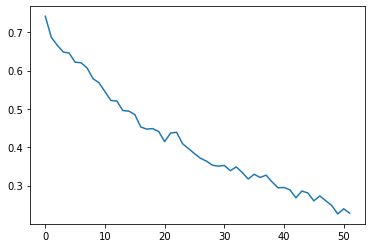

Epoch 1/100
88/88 - 3s - loss: 0.7794 - accuracy: 0.5630 - auc_95: 0.5591 - precision_95: 0.5643 - recall_95: 0.5837 - f1_score: 0.6703 - val_loss: 0.6829 - val_accuracy: 0.5697 - val_auc_95: 0.6789 - val_precision_95: 0.5436 - val_recall_95: 0.8689 - val_f1_score: 0.6667 - 3s/epoch - 29ms/step
Epoch 2/100
88/88 - 1s - loss: 0.7071 - accuracy: 0.5903 - auc_95: 0.6078 - precision_95: 0.5917 - recall_95: 0.6045 - f1_score: 0.6703 - val_loss: 0.7109 - val_accuracy: 0.5615 - val_auc_95: 0.6854 - val_precision_95: 0.5346 - val_recall_95: 0.9508 - val_f1_score: 0.6667 - 1s/epoch - 13ms/step
Epoch 3/100
88/88 - 1s - loss: 0.6718 - accuracy: 0.6245 - auc_95: 0.6535 - precision_95: 0.6301 - recall_95: 0.6181 - f1_score: 0.6703 - val_loss: 0.7230 - val_accuracy: 0.5820 - val_auc_95: 0.6622 - val_precision_95: 0.5485 - val_recall_95: 0.9262 - val_f1_score: 0.6667 - 1s/epoch - 13ms/step
Epoch 4/100
88/88 - 1s - loss: 0.6841 - accuracy: 0.6099 - auc_95: 0.6443 - precision_95: 0.6126 - recall_95: 0.

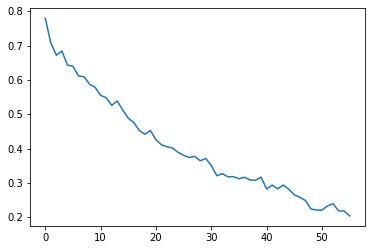

Epoch 1/100
88/88 - 3s - loss: 0.7950 - accuracy: 0.5308 - auc_96: 0.5305 - precision_96: 0.5288 - recall_96: 0.5534 - f1_score: 0.6661 - val_loss: 0.8952 - val_accuracy: 0.5432 - val_auc_96: 0.6005 - val_precision_96: 0.5443 - val_recall_96: 0.9773 - val_f1_score: 0.7040 - 3s/epoch - 32ms/step
Epoch 2/100
88/88 - 1s - loss: 0.6884 - accuracy: 0.5882 - auc_96: 0.6148 - precision_96: 0.5866 - recall_96: 0.5936 - f1_score: 0.6661 - val_loss: 0.7158 - val_accuracy: 0.5514 - val_auc_96: 0.6194 - val_precision_96: 0.5530 - val_recall_96: 0.9091 - val_f1_score: 0.7040 - 1s/epoch - 13ms/step
Epoch 3/100
88/88 - 1s - loss: 0.6582 - accuracy: 0.6306 - auc_96: 0.6615 - precision_96: 0.6280 - recall_96: 0.6384 - f1_score: 0.6661 - val_loss: 0.6890 - val_accuracy: 0.5679 - val_auc_96: 0.6334 - val_precision_96: 0.6311 - val_recall_96: 0.4924 - val_f1_score: 0.7040 - 1s/epoch - 13ms/step
Epoch 4/100
88/88 - 1s - loss: 0.6621 - accuracy: 0.6279 - auc_96: 0.6617 - precision_96: 0.6283 - recall_96: 0.

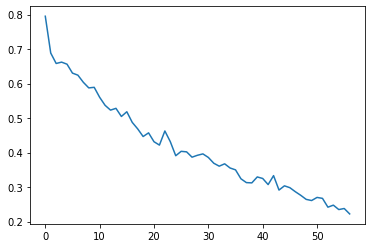

Epoch 1/100
88/88 - 3s - loss: 0.7516 - accuracy: 0.5531 - auc_97: 0.5539 - precision_97: 0.5508 - recall_97: 0.5689 - f1_score: 0.6661 - val_loss: 0.7910 - val_accuracy: 0.5185 - val_auc_97: 0.6256 - val_precision_97: 0.5434 - val_recall_97: 0.7121 - val_f1_score: 0.7040 - 3s/epoch - 29ms/step
Epoch 2/100
88/88 - 1s - loss: 0.7147 - accuracy: 0.5705 - auc_97: 0.5890 - precision_97: 0.5700 - recall_97: 0.5689 - f1_score: 0.6661 - val_loss: 0.6610 - val_accuracy: 0.6049 - val_auc_97: 0.6809 - val_precision_97: 0.5882 - val_recall_97: 0.9091 - val_f1_score: 0.7040 - 1s/epoch - 13ms/step
Epoch 3/100
88/88 - 1s - loss: 0.6746 - accuracy: 0.6261 - auc_97: 0.6504 - precision_97: 0.6270 - recall_97: 0.6201 - f1_score: 0.6661 - val_loss: 0.6439 - val_accuracy: 0.6337 - val_auc_97: 0.6797 - val_precision_97: 0.6287 - val_recall_97: 0.7955 - val_f1_score: 0.7040 - 1s/epoch - 13ms/step
Epoch 4/100
88/88 - 1s - loss: 0.6567 - accuracy: 0.6293 - auc_97: 0.6731 - precision_97: 0.6356 - recall_97: 0.

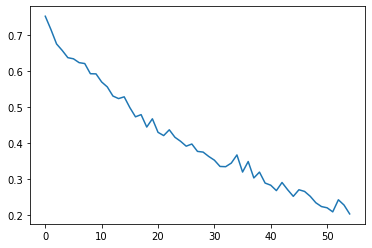

Epoch 1/100
88/88 - 3s - loss: 0.7772 - accuracy: 0.5518 - auc_98: 0.5693 - precision_98: 0.5513 - recall_98: 0.5848 - f1_score: 0.6693 - val_loss: 0.6703 - val_accuracy: 0.5638 - val_auc_98: 0.6420 - val_precision_98: 0.5634 - val_recall_98: 0.6452 - val_f1_score: 0.6757 - 3s/epoch - 29ms/step
Epoch 2/100
88/88 - 1s - loss: 0.6803 - accuracy: 0.6001 - auc_98: 0.6308 - precision_98: 0.6037 - recall_98: 0.5966 - f1_score: 0.6693 - val_loss: 0.6646 - val_accuracy: 0.6337 - val_auc_98: 0.6614 - val_precision_98: 0.6522 - val_recall_98: 0.6048 - val_f1_score: 0.6757 - 1s/epoch - 13ms/step
Epoch 3/100
88/88 - 1s - loss: 0.6723 - accuracy: 0.6124 - auc_98: 0.6457 - precision_98: 0.6122 - recall_98: 0.6256 - f1_score: 0.6693 - val_loss: 0.6590 - val_accuracy: 0.6337 - val_auc_98: 0.6836 - val_precision_98: 0.6061 - val_recall_98: 0.8065 - val_f1_score: 0.6757 - 1s/epoch - 13ms/step
Epoch 4/100
88/88 - 1s - loss: 0.6753 - accuracy: 0.6083 - auc_98: 0.6473 - precision_98: 0.6091 - recall_98: 0.

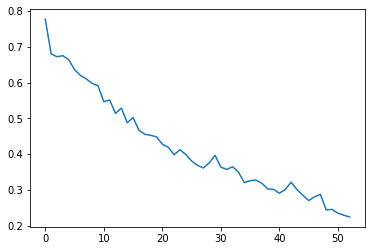

Epoch 1/100
88/88 - 2s - loss: 0.7546 - accuracy: 0.5495 - auc_99: 0.5598 - precision_99: 0.5503 - recall_99: 0.5743 - f1_score: 0.6697 - val_loss: 0.7130 - val_accuracy: 0.5309 - val_auc_99: 0.6643 - val_precision_99: 0.5222 - val_recall_99: 0.8618 - val_f1_score: 0.6721 - 2s/epoch - 28ms/step
Epoch 2/100
88/88 - 1s - loss: 0.6680 - accuracy: 0.6161 - auc_99: 0.6500 - precision_99: 0.6178 - recall_99: 0.6223 - f1_score: 0.6697 - val_loss: 0.7954 - val_accuracy: 0.5391 - val_auc_99: 0.6297 - val_precision_99: 0.5263 - val_recall_99: 0.8943 - val_f1_score: 0.6721 - 1s/epoch - 13ms/step
Epoch 3/100
88/88 - 1s - loss: 0.6693 - accuracy: 0.6088 - auc_99: 0.6505 - precision_99: 0.6079 - recall_99: 0.6277 - f1_score: 0.6697 - val_loss: 0.7097 - val_accuracy: 0.5761 - val_auc_99: 0.6700 - val_precision_99: 0.5526 - val_recall_99: 0.8537 - val_f1_score: 0.6721 - 1s/epoch - 13ms/step
Epoch 4/100
88/88 - 1s - loss: 0.6549 - accuracy: 0.6325 - auc_99: 0.6749 - precision_99: 0.6338 - recall_99: 0.

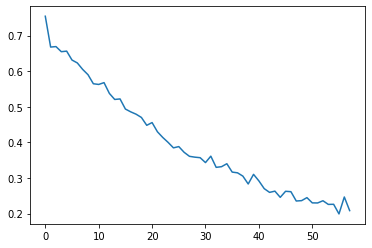

In [59]:
acc = 0.0
for train_index, val_index in kf.split(full_X):
    X_train, X_val = full_X[train_index], full_X[val_index]
    y_train, y_val = full_y[train_index], full_y[val_index]
    rcnn_binary_body_model = RCNN(n_features, None, n_length, n_outputs)
    history = rcnn_binary_body_model.train(X_train, y_train, X_val, y_val, epochs=epochs, batch_size=25)
    plt.plot(history.history['loss'])
    plt.show()
    if history.history['accuracy'][-1] > acc:
        acc = history.history['accuracy'][-1]
        rcnn_binary_body_model.save(model_path / 'body_binary_rcnn.h5')

In [60]:
rcnn_binary_body_model = load_model(model_path / 'body_binary_rcnn.h5')
y_pred = rcnn_binary_body_model.predict(X_test)
_, acc, auc, precision, recall, f1 = rcnn_binary_body_model.evaluate(X_test, y_test)
rnn_auc.append(round(auc, 2))
print('Accuracy: {:.2f}% \nROC/AUC: {:.2f} \nPrecision: {:.2f} \nRecall: {:.2f} \nF1 score: {:.2f}'.format(acc * 100, auc, precision, recall, f1))

8/8 [==============================] - 0s 9ms/step - loss: 0.7624 - accuracy: 0.5429 - auc_93: 0.7105 - precision_93: 0.9196 - recall_93: 0.5000 - f1_score: 0.9135
Accuracy: 54.29% 
ROC/AUC: 0.71 
Precision: 0.92 
Recall: 0.50 
F1 score: 0.91


## 2. Unimodal Face Modality (Action units + Head pose)

#### Apply Data Augmentation

In [8]:
X_train, X_test, y_train, y_test = load_dataset('AUs', binary=True)
X = X_train.copy()
y = y_train.copy()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

n_length, n_features, n_outputs = X_train.shape[2], X_train.shape[-1], y_train.shape[1]

(752, 1, 350, 25) (752, 1)
(268, 1, 350, 25) (268, 1)


In [62]:
jitter_X = jitter(X, sigma=0.03)

In [63]:
reshaped_X = X.reshape((X.shape[0], X.shape[2], X.shape[-1]))
rotated_X = rotation(reshaped_X)
rotated_X = rotated_X.reshape((rotated_X.shape[0], 1, rotated_X.shape[1], rotated_X.shape[-1]))

In [64]:
augmented_X = np.concatenate((rotated_X, jitter_X), axis=0)
add_y = np.concatenate((y, y), axis=0)
full_X = np.concatenate((augmented_X, X), axis=0)
full_y = np.concatenate((add_y, y), axis=0)
full_X.shape

(2346, 1, 350, 25)

### CNN + BiLSTM

Epoch 1/100
22/22 - 6s - loss: 0.7081 - accuracy: 0.5843 - auc_10: 0.6076 - precision_10: 0.5655 - recall_10: 0.5846 - f1_score: 0.6494 - val_loss: 0.6660 - val_accuracy: 0.6447 - val_auc_10: 0.6617 - val_precision_10: 0.6591 - val_recall_10: 0.7073 - val_f1_score: 0.7009 - 6s/epoch - 262ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6234 - accuracy: 0.6583 - auc_10: 0.7114 - precision_10: 0.6516 - recall_10: 0.6215 - f1_score: 0.6494 - val_loss: 0.6622 - val_accuracy: 0.6316 - val_auc_10: 0.6937 - val_precision_10: 0.6327 - val_recall_10: 0.7561 - val_f1_score: 0.7009 - 1s/epoch - 67ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5865 - accuracy: 0.6938 - auc_10: 0.7594 - precision_10: 0.6844 - recall_10: 0.6738 - f1_score: 0.6494 - val_loss: 0.7095 - val_accuracy: 0.5658 - val_auc_10: 0.5592 - val_precision_10: 0.6818 - val_recall_10: 0.3659 - val_f1_score: 0.7009 - 1s/epoch - 56ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5511 - accuracy: 0.7263 - auc_10: 0.7910 - precision_10: 0.7244 - recall_10: 0

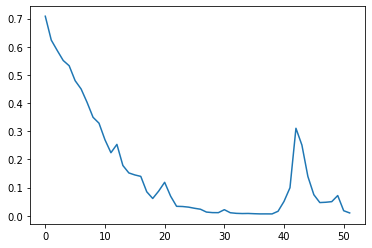

Epoch 1/100
22/22 - 6s - loss: 0.7034 - accuracy: 0.5473 - auc_11: 0.5810 - precision_11: 0.5309 - recall_11: 0.4520 - f1_score: 0.6466 - val_loss: 0.6598 - val_accuracy: 0.5658 - val_auc_11: 0.6889 - val_precision_11: 0.5658 - val_recall_11: 1.0000 - val_f1_score: 0.7227 - 6s/epoch - 258ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6343 - accuracy: 0.6672 - auc_11: 0.6944 - precision_11: 0.6441 - recall_11: 0.6780 - f1_score: 0.6466 - val_loss: 0.6813 - val_accuracy: 0.6316 - val_auc_11: 0.6374 - val_precision_11: 0.7586 - val_recall_11: 0.5116 - val_f1_score: 0.7227 - 1s/epoch - 56ms/step
Epoch 3/100
22/22 - 1s - loss: 0.6172 - accuracy: 0.6672 - auc_11: 0.7184 - precision_11: 0.6541 - recall_11: 0.6440 - f1_score: 0.6466 - val_loss: 0.6612 - val_accuracy: 0.6447 - val_auc_11: 0.7445 - val_precision_11: 0.9444 - val_recall_11: 0.3953 - val_f1_score: 0.7227 - 1s/epoch - 56ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5659 - accuracy: 0.6997 - auc_11: 0.7750 - precision_11: 0.6935 - recall_11: 0

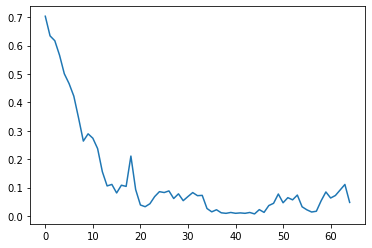

Epoch 1/100
22/22 - 5s - loss: 0.6965 - accuracy: 0.5938 - auc_12: 0.6112 - precision_12: 0.5934 - recall_12: 0.5452 - f1_score: 0.6581 - val_loss: 0.7635 - val_accuracy: 0.4533 - val_auc_12: 0.6245 - val_precision_12: 0.4533 - val_recall_12: 1.0000 - val_f1_score: 0.6239 - 5s/epoch - 249ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6276 - accuracy: 0.6514 - auc_12: 0.7016 - precision_12: 0.6491 - recall_12: 0.6295 - f1_score: 0.6581 - val_loss: 0.6536 - val_accuracy: 0.6133 - val_auc_12: 0.6998 - val_precision_12: 0.6667 - val_recall_12: 0.2941 - val_f1_score: 0.6239 - 1s/epoch - 67ms/step
Epoch 3/100
22/22 - 1s - loss: 0.6055 - accuracy: 0.6809 - auc_12: 0.7350 - precision_12: 0.6747 - recall_12: 0.6747 - f1_score: 0.6581 - val_loss: 0.7634 - val_accuracy: 0.5600 - val_auc_12: 0.6729 - val_precision_12: 1.0000 - val_recall_12: 0.0294 - val_f1_score: 0.6239 - 1s/epoch - 56ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5574 - accuracy: 0.7149 - auc_12: 0.7887 - precision_12: 0.7152 - recall_12: 0

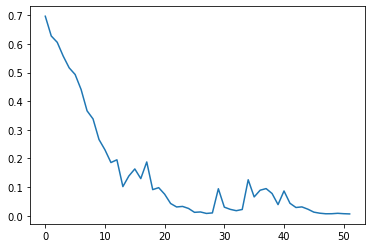

Epoch 1/100
22/22 - 6s - loss: 0.6819 - accuracy: 0.6145 - auc_13: 0.6262 - precision_13: 0.6201 - recall_13: 0.5274 - f1_score: 0.6527 - val_loss: 0.6766 - val_accuracy: 0.4933 - val_auc_13: 0.7294 - val_precision_13: 0.5000 - val_recall_13: 0.9737 - val_f1_score: 0.6726 - 6s/epoch - 265ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6287 - accuracy: 0.6721 - auc_13: 0.7006 - precision_13: 0.6626 - recall_13: 0.6585 - f1_score: 0.6527 - val_loss: 0.6941 - val_accuracy: 0.5867 - val_auc_13: 0.6330 - val_precision_13: 0.5714 - val_recall_13: 0.7368 - val_f1_score: 0.6726 - 1s/epoch - 57ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5857 - accuracy: 0.6957 - auc_13: 0.7601 - precision_13: 0.7007 - recall_13: 0.6494 - f1_score: 0.6527 - val_loss: 0.6719 - val_accuracy: 0.6000 - val_auc_13: 0.6622 - val_precision_13: 0.6111 - val_recall_13: 0.5789 - val_f1_score: 0.6726 - 1s/epoch - 67ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5414 - accuracy: 0.7267 - auc_13: 0.8033 - precision_13: 0.7109 - recall_13: 0

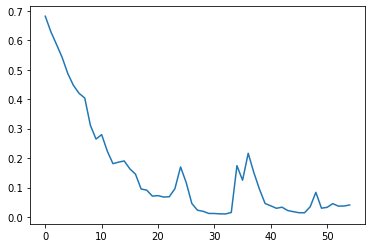

Epoch 1/100
22/22 - 6s - loss: 0.6713 - accuracy: 0.5953 - auc_14: 0.6456 - precision_14: 0.5955 - recall_14: 0.5599 - f1_score: 0.6607 - val_loss: 0.7700 - val_accuracy: 0.4267 - val_auc_14: 0.4717 - val_precision_14: 0.4267 - val_recall_14: 1.0000 - val_f1_score: 0.5981 - 6s/epoch - 261ms/step
Epoch 2/100
22/22 - 2s - loss: 0.6159 - accuracy: 0.6573 - auc_14: 0.7176 - precision_14: 0.6401 - recall_14: 0.6976 - f1_score: 0.6607 - val_loss: 0.7147 - val_accuracy: 0.5867 - val_auc_14: 0.5472 - val_precision_14: 0.5161 - val_recall_14: 0.5000 - val_f1_score: 0.5981 - 2s/epoch - 70ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5823 - accuracy: 0.6765 - auc_14: 0.7548 - precision_14: 0.6758 - recall_14: 0.6617 - f1_score: 0.6607 - val_loss: 0.7955 - val_accuracy: 0.4400 - val_auc_14: 0.6232 - val_precision_14: 0.4286 - val_recall_14: 0.9375 - val_f1_score: 0.5981 - 1s/epoch - 59ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5434 - accuracy: 0.7134 - auc_14: 0.7894 - precision_14: 0.7023 - recall_14: 0

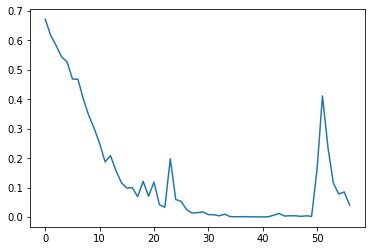

Epoch 1/100
22/22 - 6s - loss: 0.6932 - accuracy: 0.5968 - auc_15: 0.6134 - precision_15: 0.5921 - recall_15: 0.5471 - f1_score: 0.6541 - val_loss: 0.6448 - val_accuracy: 0.6667 - val_auc_15: 0.7703 - val_precision_15: 0.6364 - val_recall_15: 0.7568 - val_f1_score: 0.6607 - 6s/epoch - 251ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6212 - accuracy: 0.6573 - auc_15: 0.7110 - precision_15: 0.6611 - recall_15: 0.6049 - f1_score: 0.6541 - val_loss: 0.7153 - val_accuracy: 0.4933 - val_auc_15: 0.7329 - val_precision_15: 0.4933 - val_recall_15: 1.0000 - val_f1_score: 0.6607 - 1s/epoch - 57ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5973 - accuracy: 0.6795 - auc_15: 0.7388 - precision_15: 0.6637 - recall_15: 0.6900 - f1_score: 0.6541 - val_loss: 0.7159 - val_accuracy: 0.6800 - val_auc_15: 0.7027 - val_precision_15: 0.6970 - val_recall_15: 0.6216 - val_f1_score: 0.6607 - 1s/epoch - 57ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5655 - accuracy: 0.6839 - auc_15: 0.7742 - precision_15: 0.6923 - recall_15: 0

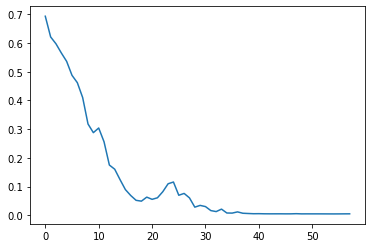

Epoch 1/100
22/22 - 6s - loss: 0.7165 - accuracy: 0.5953 - auc_16: 0.6073 - precision_16: 0.5906 - recall_16: 0.5693 - f1_score: 0.6581 - val_loss: 0.6510 - val_accuracy: 0.6133 - val_auc_16: 0.7321 - val_precision_16: 1.0000 - val_recall_16: 0.1471 - val_f1_score: 0.6239 - 6s/epoch - 265ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6342 - accuracy: 0.6411 - auc_16: 0.6941 - precision_16: 0.6572 - recall_16: 0.5602 - f1_score: 0.6581 - val_loss: 0.6377 - val_accuracy: 0.6533 - val_auc_16: 0.7428 - val_precision_16: 0.6429 - val_recall_16: 0.5294 - val_f1_score: 0.6239 - 1s/epoch - 67ms/step
Epoch 3/100
22/22 - 1s - loss: 0.6005 - accuracy: 0.6603 - auc_16: 0.7395 - precision_16: 0.6689 - recall_16: 0.6084 - f1_score: 0.6581 - val_loss: 0.7310 - val_accuracy: 0.4800 - val_auc_16: 0.7292 - val_precision_16: 0.4648 - val_recall_16: 0.9706 - val_f1_score: 0.6239 - 1s/epoch - 58ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5480 - accuracy: 0.7208 - auc_16: 0.7968 - precision_16: 0.7097 - recall_16: 0

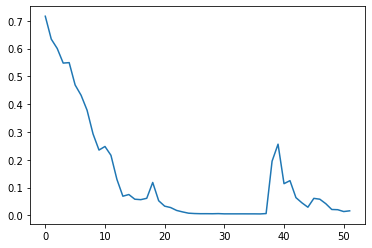

Epoch 1/100
22/22 - 6s - loss: 0.6946 - accuracy: 0.6012 - auc_17: 0.6314 - precision_17: 0.5962 - recall_17: 0.5710 - f1_score: 0.6567 - val_loss: 0.6904 - val_accuracy: 0.4933 - val_auc_17: 0.6021 - val_precision_17: 0.2857 - val_recall_17: 0.0571 - val_f1_score: 0.6364 - 6s/epoch - 260ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6250 - accuracy: 0.6573 - auc_17: 0.7117 - precision_17: 0.6623 - recall_17: 0.6103 - f1_score: 0.6567 - val_loss: 0.6533 - val_accuracy: 0.6267 - val_auc_17: 0.6746 - val_precision_17: 0.5854 - val_recall_17: 0.6857 - val_f1_score: 0.6364 - 1s/epoch - 67ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5903 - accuracy: 0.6795 - auc_17: 0.7527 - precision_17: 0.6827 - recall_17: 0.6435 - f1_score: 0.6567 - val_loss: 0.7368 - val_accuracy: 0.3600 - val_auc_17: 0.3561 - val_precision_17: 0.2903 - val_recall_17: 0.2571 - val_f1_score: 0.6364 - 1s/epoch - 58ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5430 - accuracy: 0.7164 - auc_17: 0.7985 - precision_17: 0.7235 - recall_17: 0

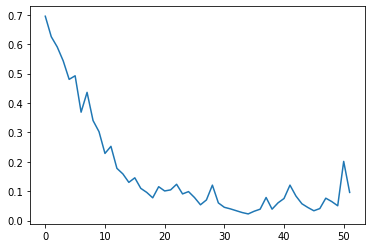

Epoch 1/100
22/22 - 5s - loss: 0.6836 - accuracy: 0.6012 - auc_18: 0.6378 - precision_18: 0.5884 - recall_18: 0.5631 - f1_score: 0.6487 - val_loss: 0.7134 - val_accuracy: 0.4533 - val_auc_18: 0.5814 - val_precision_18: 0.0000e+00 - val_recall_18: 0.0000e+00 - val_f1_score: 0.7069 - 5s/epoch - 250ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6257 - accuracy: 0.6647 - auc_18: 0.7078 - precision_18: 0.6541 - recall_18: 0.6400 - f1_score: 0.6487 - val_loss: 0.6692 - val_accuracy: 0.5600 - val_auc_18: 0.6471 - val_precision_18: 0.5541 - val_recall_18: 1.0000 - val_f1_score: 0.7069 - 1s/epoch - 67ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5854 - accuracy: 0.6928 - auc_18: 0.7566 - precision_18: 0.6706 - recall_18: 0.7077 - f1_score: 0.6487 - val_loss: 0.6865 - val_accuracy: 0.6133 - val_auc_18: 0.6510 - val_precision_18: 0.7000 - val_recall_18: 0.5122 - val_f1_score: 0.7069 - 1s/epoch - 57ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5514 - accuracy: 0.7179 - auc_18: 0.7919 - precision_18: 0.7030 - reca

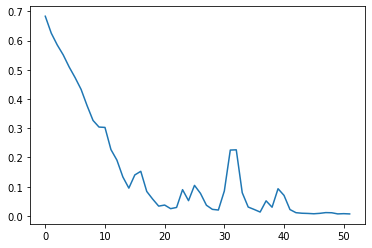

Epoch 1/100
22/22 - 6s - loss: 0.7194 - accuracy: 0.5849 - auc_19: 0.6053 - precision_19: 0.5918 - recall_19: 0.5194 - f1_score: 0.6621 - val_loss: 0.6648 - val_accuracy: 0.6533 - val_auc_19: 0.6631 - val_precision_19: 0.6087 - val_recall_19: 0.4516 - val_f1_score: 0.5849 - 6s/epoch - 265ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6128 - accuracy: 0.6839 - auc_19: 0.7268 - precision_19: 0.7010 - recall_19: 0.6299 - f1_score: 0.6621 - val_loss: 0.6665 - val_accuracy: 0.6000 - val_auc_19: 0.6074 - val_precision_19: 0.5714 - val_recall_19: 0.1290 - val_f1_score: 0.5849 - 1s/epoch - 57ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5801 - accuracy: 0.7149 - auc_19: 0.7659 - precision_19: 0.7088 - recall_19: 0.7194 - f1_score: 0.6621 - val_loss: 1.0394 - val_accuracy: 0.5867 - val_auc_19: 0.5433 - val_precision_19: 0.0000e+00 - val_recall_19: 0.0000e+00 - val_f1_score: 0.5849 - 1s/epoch - 57ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5389 - accuracy: 0.7445 - auc_19: 0.8060 - precision_19: 0.7455 - reca

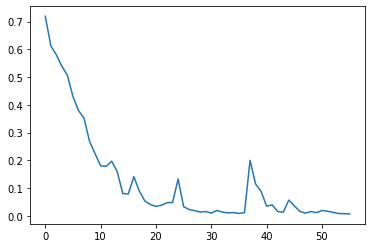

In [10]:
acc = 0.0
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    cnnlstm_binary_face_model = CNNLSTM(n_features, None, n_length, n_outputs)
    history = cnnlstm_binary_face_model.train(X_train, y_train, X_val, y_val, epochs=epochs, batch_size=32)
    plt.plot(history.history['loss'])
    plt.show()
    if history.history['accuracy'][-1] > acc:
        acc = history.history['accuracy'][-1]
        cnnlstm_binary_face_model.save(model_path / 'face_binary_cnnlstm.h5')

In [11]:
cnnlstm_binary_face_model = load_model(model_path / 'face_binary_cnnlstm.h5')
y_pred = cnnlstm_binary_face_model.predict(X_test)
_, acc, auc, precision, recall, f1 = cnnlstm_binary_face_model.evaluate(X_test, y_test)
cnn_auc.append(round(auc, 2))
print('Accuracy: {:.2f}% \nROC/AUC: {:.2f} \nPrecision: {:.2f} \nRecall: {:.2f} \nF1 score: {:.2f}'.format(acc * 100, auc, precision, recall, f1))

9/9 [==============================] - 1s 13ms/step - loss: 0.8756 - accuracy: 0.4403 - auc_12: 0.6675 - precision_12: 0.9551 - recall_12: 0.3680 - f1_score: 0.9259
Accuracy: 44.03% 
ROC/AUC: 0.67 
Precision: 0.96 
Recall: 0.37 
F1 score: 0.93


### RCNN

Epoch 1/100
85/85 - 2s - loss: 0.8144 - accuracy: 0.5277 - auc_110: 0.5420 - precision_110: 0.5343 - recall_110: 0.5248 - f1_score: 0.6723 - val_loss: 0.7205 - val_accuracy: 0.5064 - val_auc_110: 0.5125 - val_precision_110: 0.5000 - val_recall_110: 0.9828 - val_f1_score: 0.6610 - 2s/epoch - 29ms/step
Epoch 2/100
85/85 - 1s - loss: 0.7508 - accuracy: 0.5291 - auc_110: 0.5462 - precision_110: 0.5299 - recall_110: 0.6221 - f1_score: 0.6723 - val_loss: 0.6933 - val_accuracy: 0.5064 - val_auc_110: 0.5375 - val_precision_110: 0.5000 - val_recall_110: 1.0000 - val_f1_score: 0.6610 - 1s/epoch - 13ms/step
Epoch 3/100
85/85 - 1s - loss: 0.6907 - accuracy: 0.5699 - auc_110: 0.5987 - precision_110: 0.5618 - recall_110: 0.6848 - f1_score: 0.6723 - val_loss: 0.8013 - val_accuracy: 0.5064 - val_auc_110: 0.5125 - val_precision_110: 0.5000 - val_recall_110: 1.0000 - val_f1_score: 0.6610 - 1s/epoch - 13ms/step
Epoch 4/100
85/85 - 1s - loss: 0.6888 - accuracy: 0.5552 - auc_110: 0.5862 - precision_110: 0.

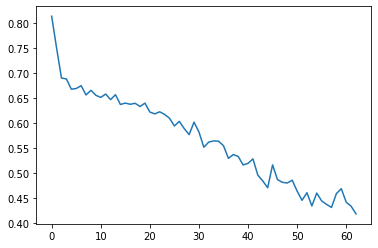

Epoch 1/100
85/85 - 2s - loss: 0.8080 - accuracy: 0.5348 - auc_111: 0.5473 - precision_111: 0.5421 - recall_111: 0.5239 - f1_score: 0.6723 - val_loss: 0.8118 - val_accuracy: 0.4894 - val_auc_111: 0.4954 - val_precision_111: 0.4912 - val_recall_111: 0.9655 - val_f1_score: 0.6610 - 2s/epoch - 29ms/step
Epoch 2/100
85/85 - 1s - loss: 0.7194 - accuracy: 0.5377 - auc_111: 0.5562 - precision_111: 0.5364 - recall_111: 0.6417 - f1_score: 0.6723 - val_loss: 0.6950 - val_accuracy: 0.5021 - val_auc_111: 0.5212 - val_precision_111: 0.4979 - val_recall_111: 1.0000 - val_f1_score: 0.6610 - 1s/epoch - 13ms/step
Epoch 3/100
85/85 - 1s - loss: 0.7117 - accuracy: 0.5462 - auc_111: 0.5641 - precision_111: 0.5407 - recall_111: 0.6894 - f1_score: 0.6723 - val_loss: 0.6878 - val_accuracy: 0.5191 - val_auc_111: 0.5212 - val_precision_111: 0.8000 - val_recall_111: 0.0345 - val_f1_score: 0.6610 - 1s/epoch - 12ms/step
Epoch 4/100
85/85 - 1s - loss: 0.6839 - accuracy: 0.5557 - auc_111: 0.5930 - precision_111: 0.

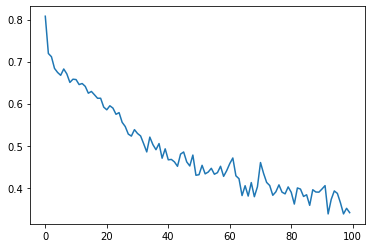

Epoch 1/100
85/85 - 2s - loss: 0.8027 - accuracy: 0.5306 - auc_112: 0.5219 - precision_112: 0.5289 - recall_112: 0.6269 - f1_score: 0.6702 - val_loss: 0.6775 - val_accuracy: 0.4979 - val_auc_112: 0.5208 - val_precision_112: 0.8000 - val_recall_112: 0.0331 - val_f1_score: 0.6798 - 2s/epoch - 28ms/step
Epoch 2/100
85/85 - 1s - loss: 0.7312 - accuracy: 0.5339 - auc_112: 0.5400 - precision_112: 0.5350 - recall_112: 0.5752 - f1_score: 0.6702 - val_loss: 0.6762 - val_accuracy: 0.5277 - val_auc_112: 0.5293 - val_precision_112: 0.5216 - val_recall_112: 1.0000 - val_f1_score: 0.6798 - 1s/epoch - 12ms/step
Epoch 3/100
85/85 - 1s - loss: 0.6922 - accuracy: 0.5486 - auc_112: 0.5732 - precision_112: 0.5453 - recall_112: 0.6278 - f1_score: 0.6702 - val_loss: 0.6884 - val_accuracy: 0.5191 - val_auc_112: 0.5132 - val_precision_112: 0.5174 - val_recall_112: 0.9835 - val_f1_score: 0.6798 - 1s/epoch - 12ms/step
Epoch 4/100
85/85 - 1s - loss: 0.6785 - accuracy: 0.5732 - auc_112: 0.6119 - precision_112: 0.

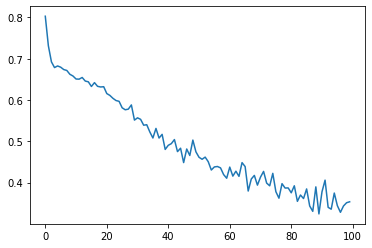

Epoch 1/100
85/85 - 3s - loss: 0.9054 - accuracy: 0.4922 - auc_113: 0.4991 - precision_113: 0.4987 - recall_113: 0.5566 - f1_score: 0.6719 - val_loss: 0.7619 - val_accuracy: 0.4894 - val_auc_113: 0.4833 - val_precision_113: 0.4914 - val_recall_113: 0.9828 - val_f1_score: 0.6610 - 3s/epoch - 30ms/step
Epoch 2/100
85/85 - 1s - loss: 0.6958 - accuracy: 0.5405 - auc_113: 0.5579 - precision_113: 0.5409 - recall_113: 0.6127 - f1_score: 0.6723 - val_loss: 0.7553 - val_accuracy: 0.4894 - val_auc_113: 0.4831 - val_precision_113: 0.4914 - val_recall_113: 0.9828 - val_f1_score: 0.6610 - 1s/epoch - 13ms/step
Epoch 3/100
85/85 - 1s - loss: 0.6991 - accuracy: 0.5424 - auc_113: 0.5670 - precision_113: 0.5390 - recall_113: 0.6660 - f1_score: 0.6723 - val_loss: 0.7142 - val_accuracy: 0.5021 - val_auc_113: 0.5083 - val_precision_113: 0.4979 - val_recall_113: 1.0000 - val_f1_score: 0.6610 - 1s/epoch - 13ms/step
Epoch 4/100
85/85 - 1s - loss: 0.6816 - accuracy: 0.5632 - auc_113: 0.5916 - precision_113: 0.

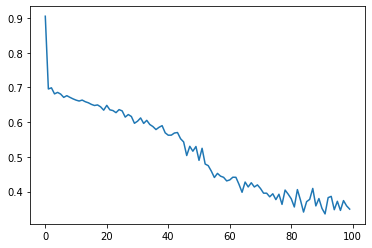

Epoch 1/100
85/85 - 2s - loss: 0.7889 - accuracy: 0.5291 - auc_114: 0.5398 - precision_114: 0.5366 - recall_114: 0.4892 - f1_score: 0.6707 - val_loss: 0.7852 - val_accuracy: 0.4894 - val_auc_114: 0.5272 - val_precision_114: 0.0000e+00 - val_recall_114: 0.0000e+00 - val_f1_score: 0.6761 - 2s/epoch - 29ms/step
Epoch 2/100
85/85 - 1s - loss: 0.7068 - accuracy: 0.5424 - auc_114: 0.5596 - precision_114: 0.5418 - recall_114: 0.6019 - f1_score: 0.6707 - val_loss: 0.7010 - val_accuracy: 0.5064 - val_auc_114: 0.4967 - val_precision_114: 0.5088 - val_recall_114: 0.9667 - val_f1_score: 0.6761 - 1s/epoch - 13ms/step
Epoch 3/100
85/85 - 1s - loss: 0.6990 - accuracy: 0.5476 - auc_114: 0.5748 - precision_114: 0.5564 - recall_114: 0.5099 - f1_score: 0.6707 - val_loss: 0.6863 - val_accuracy: 0.5191 - val_auc_114: 0.5207 - val_precision_114: 0.5150 - val_recall_114: 1.0000 - val_f1_score: 0.6761 - 1s/epoch - 13ms/step
Epoch 4/100
85/85 - 1s - loss: 0.6824 - accuracy: 0.5694 - auc_114: 0.6053 - precision

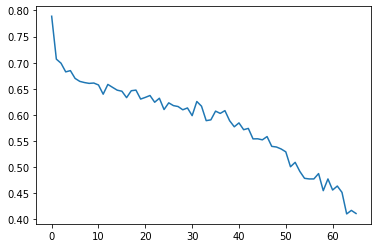

Epoch 1/100
85/85 - 2s - loss: 0.7793 - accuracy: 0.5088 - auc_115: 0.5170 - precision_115: 0.5138 - recall_115: 0.5047 - f1_score: 0.6711 - val_loss: 0.7387 - val_accuracy: 0.5021 - val_auc_115: 0.5168 - val_precision_115: 0.7500 - val_recall_115: 0.0252 - val_f1_score: 0.6723 - 2s/epoch - 28ms/step
Epoch 2/100
85/85 - 1s - loss: 0.7162 - accuracy: 0.5486 - auc_115: 0.5725 - precision_115: 0.5638 - recall_115: 0.4681 - f1_score: 0.6711 - val_loss: 0.7181 - val_accuracy: 0.5149 - val_auc_115: 0.5168 - val_precision_115: 0.5108 - val_recall_115: 0.9916 - val_f1_score: 0.6723 - 1s/epoch - 12ms/step
Epoch 3/100
85/85 - 1s - loss: 0.7183 - accuracy: 0.5448 - auc_115: 0.5710 - precision_115: 0.5408 - recall_115: 0.6529 - f1_score: 0.6711 - val_loss: 0.6936 - val_accuracy: 0.5191 - val_auc_115: 0.5250 - val_precision_115: 0.5129 - val_recall_115: 1.0000 - val_f1_score: 0.6723 - 1s/epoch - 14ms/step
Epoch 4/100
85/85 - 1s - loss: 0.6746 - accuracy: 0.5490 - auc_115: 0.5905 - precision_115: 0.

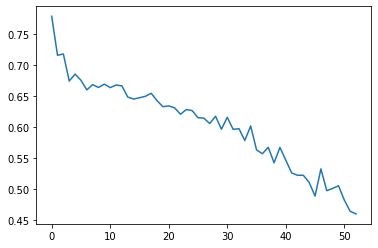

Epoch 1/100
85/85 - 2s - loss: 0.7852 - accuracy: 0.5090 - auc_116: 0.5102 - precision_116: 0.5096 - recall_116: 0.5736 - f1_score: 0.6683 - val_loss: 0.7216 - val_accuracy: 0.4658 - val_auc_116: 0.5085 - val_precision_116: 0.5000 - val_recall_116: 0.0080 - val_f1_score: 0.6964 - 2s/epoch - 29ms/step
Epoch 2/100
85/85 - 1s - loss: 0.7139 - accuracy: 0.5488 - auc_116: 0.5546 - precision_116: 0.5493 - recall_116: 0.5623 - f1_score: 0.6683 - val_loss: 0.7251 - val_accuracy: 0.5385 - val_auc_116: 0.4994 - val_precision_116: 0.5365 - val_recall_116: 1.0000 - val_f1_score: 0.6964 - 1s/epoch - 13ms/step
Epoch 3/100
85/85 - 1s - loss: 0.6918 - accuracy: 0.5402 - auc_116: 0.5676 - precision_116: 0.5348 - recall_116: 0.6453 - f1_score: 0.6683 - val_loss: 0.7112 - val_accuracy: 0.5385 - val_auc_116: 0.4994 - val_precision_116: 0.5365 - val_recall_116: 1.0000 - val_f1_score: 0.6964 - 1s/epoch - 14ms/step
Epoch 4/100
85/85 - 1s - loss: 0.6840 - accuracy: 0.5317 - auc_116: 0.5595 - precision_116: 0.

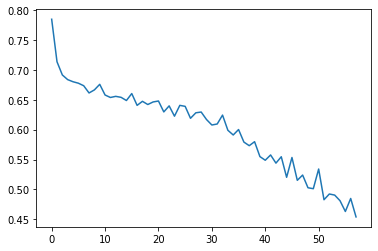

Epoch 1/100
85/85 - 2s - loss: 0.8062 - accuracy: 0.5374 - auc_117: 0.5458 - precision_117: 0.5457 - recall_117: 0.5745 - f1_score: 0.6771 - val_loss: 0.7871 - val_accuracy: 0.4359 - val_auc_117: 0.4895 - val_precision_117: 0.4391 - val_recall_117: 0.9712 - val_f1_score: 0.6154 - 2s/epoch - 29ms/step
Epoch 2/100
85/85 - 1s - loss: 0.7019 - accuracy: 0.5554 - auc_117: 0.5794 - precision_117: 0.5710 - recall_117: 0.5282 - f1_score: 0.6771 - val_loss: 0.7257 - val_accuracy: 0.4402 - val_auc_117: 0.5252 - val_precision_117: 0.4416 - val_recall_117: 0.9808 - val_f1_score: 0.6154 - 1s/epoch - 13ms/step
Epoch 3/100
85/85 - 1s - loss: 0.6910 - accuracy: 0.5379 - auc_117: 0.5605 - precision_117: 0.5396 - recall_117: 0.6623 - f1_score: 0.6771 - val_loss: 0.7485 - val_accuracy: 0.4402 - val_auc_117: 0.4990 - val_precision_117: 0.4416 - val_recall_117: 0.9808 - val_f1_score: 0.6154 - 988ms/epoch - 12ms/step
Epoch 4/100
85/85 - 1s - loss: 0.6755 - accuracy: 0.5786 - auc_117: 0.6048 - precision_117:

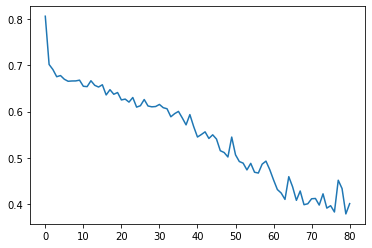

Epoch 1/100
85/85 - 3s - loss: 0.7868 - accuracy: 0.5275 - auc_118: 0.5491 - precision_118: 0.5282 - recall_118: 0.5897 - f1_score: 0.6700 - val_loss: 0.7836 - val_accuracy: 0.5000 - val_auc_118: 0.4876 - val_precision_118: 0.5066 - val_recall_118: 0.9667 - val_f1_score: 0.6780 - 3s/epoch - 30ms/step
Epoch 2/100
85/85 - 1s - loss: 0.7047 - accuracy: 0.5634 - auc_118: 0.5856 - precision_118: 0.5788 - recall_118: 0.4930 - f1_score: 0.6704 - val_loss: 0.8260 - val_accuracy: 0.4872 - val_auc_118: 0.4876 - val_precision_118: 0.0000e+00 - val_recall_118: 0.0000e+00 - val_f1_score: 0.6780 - 1s/epoch - 13ms/step
Epoch 3/100
85/85 - 1s - loss: 0.7021 - accuracy: 0.5393 - auc_118: 0.5658 - precision_118: 0.5371 - recall_118: 0.6254 - f1_score: 0.6704 - val_loss: 0.8209 - val_accuracy: 0.4915 - val_auc_118: 0.4960 - val_precision_118: 1.0000 - val_recall_118: 0.0083 - val_f1_score: 0.6780 - 1s/epoch - 13ms/step
Epoch 4/100
85/85 - 1s - loss: 0.6751 - accuracy: 0.5597 - auc_118: 0.6055 - precision

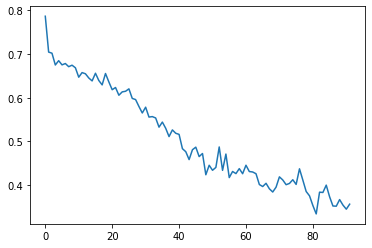

Epoch 1/100
85/85 - 3s - loss: 0.8184 - accuracy: 0.5156 - auc_119: 0.5205 - precision_119: 0.5147 - recall_119: 0.5620 - f1_score: 0.6671 - val_loss: 0.7353 - val_accuracy: 0.5470 - val_auc_119: 0.4953 - val_precision_119: 0.5474 - val_recall_119: 0.9922 - val_f1_score: 0.7072 - 3s/epoch - 31ms/step
Epoch 2/100
85/85 - 1s - loss: 0.7224 - accuracy: 0.5194 - auc_119: 0.5241 - precision_119: 0.5163 - recall_119: 0.6282 - f1_score: 0.6671 - val_loss: 0.7244 - val_accuracy: 0.4530 - val_auc_119: 0.5047 - val_precision_119: 0.5000 - val_recall_119: 0.0078 - val_f1_score: 0.7072 - 1s/epoch - 12ms/step
Epoch 3/100
85/85 - 1s - loss: 0.7009 - accuracy: 0.5488 - auc_119: 0.5777 - precision_119: 0.5479 - recall_119: 0.5629 - f1_score: 0.6671 - val_loss: 0.6887 - val_accuracy: 0.4530 - val_auc_119: 0.5125 - val_precision_119: 0.5000 - val_recall_119: 0.0312 - val_f1_score: 0.7072 - 1s/epoch - 13ms/step
Epoch 4/100
85/85 - 1s - loss: 0.6825 - accuracy: 0.5545 - auc_119: 0.5850 - precision_119: 0.

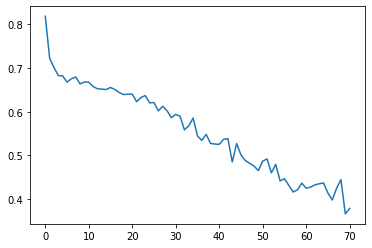

In [67]:
acc = 0.0
for train_index, val_index in kf.split(full_X):
    X_train, X_val = full_X[train_index], full_X[val_index]
    y_train, y_val = full_y[train_index], full_y[val_index]
    rcnn_binary_face_model = RCNN(n_features, None, n_length, n_outputs)
    history = rcnn_binary_face_model.train(X_train, y_train, X_val, y_val, epochs=epochs, batch_size=25)
    plt.plot(history.history['loss'])
    plt.show()
    if history.history['accuracy'][-1] > acc:
        acc = history.history['accuracy'][-1]
        rcnn_binary_face_model.save(model_path / 'face_binary_rcnn.h5')

In [68]:
rcnn_binary_face_model = load_model(model_path / 'face_binary_rcnn.h5')
y_pred = rcnn_binary_face_model.predict(X_test)
_, acc, auc, precision, recall, f1 = rcnn_binary_face_model.evaluate(X_test, y_test)
rnn_auc.append(round(auc, 2))
print('Accuracy: {:.2f}% \nROC/AUC: {:.2f} \nPrecision: {:.2f} \nRecall: {:.2f} \nF1 score: {:.2f}'.format(acc * 100, auc, precision, recall, f1))

8/8 [==============================] - 0s 7ms/step - loss: 1.1520 - accuracy: 0.7983 - auc_113: 0.4500 - precision_113: 0.8407 - recall_113: 0.9406 - f1_score: 0.9182
Accuracy: 79.83% 
ROC/AUC: 0.45 
Precision: 0.84 
Recall: 0.94 
F1 score: 0.92


## 3. Multimodal Early Fusion

In [12]:
X_train, X_test, y_train, y_test = load_fusioned_dataset(binary=True)
X = X_train.copy()
y = y_train.copy()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

n_length, n_features, n_outputs = X_train.shape[2], X_train.shape[-1], y_train.shape[1]

(752, 1, 350, 60) (752, 1)
(268, 1, 350, 60) (268, 1)


In [70]:
jitter_X = jitter(X, sigma=0.03)

In [71]:
reshaped_X = X.reshape((X.shape[0], X.shape[2], X.shape[-1]))
rotated_X = rotation(reshaped_X)
rotated_X = rotated_X.reshape((rotated_X.shape[0], 1, rotated_X.shape[1], rotated_X.shape[-1]))

In [72]:
augmented_X = np.concatenate((rotated_X, jitter_X), axis=0)
add_y = np.concatenate((y, y), axis=0)
full_X = np.concatenate((augmented_X, X), axis=0)
full_y = np.concatenate((add_y, y), axis=0)
full_X.shape

(2346, 1, 350, 60)

### CNN + BiLSTM

Epoch 1/100
28/28 - 6s - loss: 0.6707 - accuracy: 0.6080 - auc_20: 0.6441 - precision_20: 0.5949 - recall_20: 0.5785 - f1_score: 0.6494 - val_loss: 0.6461 - val_accuracy: 0.6316 - val_auc_20: 0.7017 - val_precision_20: 0.6757 - val_recall_20: 0.6098 - val_f1_score: 0.7009 - 6s/epoch - 218ms/step
Epoch 2/100
28/28 - 2s - loss: 0.6298 - accuracy: 0.6464 - auc_20: 0.6952 - precision_20: 0.6503 - recall_20: 0.5723 - f1_score: 0.6494 - val_loss: 0.6307 - val_accuracy: 0.6842 - val_auc_20: 0.7233 - val_precision_20: 0.7179 - val_recall_20: 0.6829 - val_f1_score: 0.7009 - 2s/epoch - 61ms/step
Epoch 3/100
28/28 - 1s - loss: 0.5880 - accuracy: 0.6967 - auc_20: 0.7542 - precision_20: 0.7083 - recall_20: 0.6277 - f1_score: 0.6494 - val_loss: 0.7223 - val_accuracy: 0.4605 - val_auc_20: 0.7627 - val_precision_20: 0.0000e+00 - val_recall_20: 0.0000e+00 - val_f1_score: 0.7009 - 1s/epoch - 53ms/step
Epoch 4/100
28/28 - 2s - loss: 0.5712 - accuracy: 0.7041 - auc_20: 0.7730 - precision_20: 0.7341 - reca

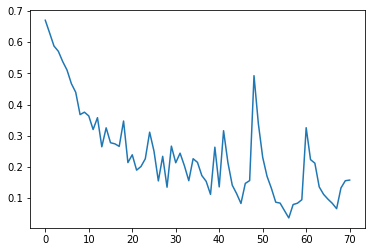

Epoch 1/100
28/28 - 6s - loss: 0.7002 - accuracy: 0.5873 - auc_21: 0.6087 - precision_21: 0.5894 - recall_21: 0.4489 - f1_score: 0.6466 - val_loss: 0.6478 - val_accuracy: 0.7237 - val_auc_21: 0.7206 - val_precision_21: 0.8056 - val_recall_21: 0.6744 - val_f1_score: 0.7227 - 6s/epoch - 215ms/step
Epoch 2/100
28/28 - 2s - loss: 0.6181 - accuracy: 0.6701 - auc_21: 0.7191 - precision_21: 0.6748 - recall_21: 0.5975 - f1_score: 0.6466 - val_loss: 0.6742 - val_accuracy: 0.5395 - val_auc_21: 0.6290 - val_precision_21: 0.6176 - val_recall_21: 0.4884 - val_f1_score: 0.7227 - 2s/epoch - 57ms/step
Epoch 3/100
28/28 - 2s - loss: 0.5877 - accuracy: 0.6893 - auc_21: 0.7574 - precision_21: 0.7025 - recall_21: 0.6068 - f1_score: 0.6466 - val_loss: 0.7622 - val_accuracy: 0.4868 - val_auc_21: 0.7428 - val_precision_21: 1.0000 - val_recall_21: 0.0930 - val_f1_score: 0.7227 - 2s/epoch - 56ms/step
Epoch 4/100
28/28 - 2s - loss: 0.5634 - accuracy: 0.7249 - auc_21: 0.7839 - precision_21: 0.7387 - recall_21: 0

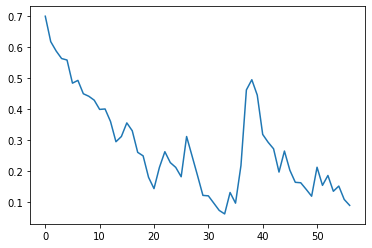

Epoch 1/100
28/28 - 6s - loss: 0.6894 - accuracy: 0.6056 - auc_22: 0.6247 - precision_22: 0.6087 - recall_22: 0.5482 - f1_score: 0.6581 - val_loss: 0.6820 - val_accuracy: 0.5867 - val_auc_22: 0.6367 - val_precision_22: 0.5517 - val_recall_22: 0.4706 - val_f1_score: 0.6239 - 6s/epoch - 209ms/step
Epoch 2/100
28/28 - 2s - loss: 0.6209 - accuracy: 0.6573 - auc_22: 0.7195 - precision_22: 0.6678 - recall_22: 0.5994 - f1_score: 0.6581 - val_loss: 0.8003 - val_accuracy: 0.5467 - val_auc_22: 0.6474 - val_precision_22: 0.5000 - val_recall_22: 0.9118 - val_f1_score: 0.6239 - 2s/epoch - 56ms/step
Epoch 3/100
28/28 - 2s - loss: 0.5854 - accuracy: 0.6928 - auc_22: 0.7584 - precision_22: 0.7053 - recall_22: 0.6416 - f1_score: 0.6581 - val_loss: 0.7166 - val_accuracy: 0.6133 - val_auc_22: 0.6327 - val_precision_22: 0.5758 - val_recall_22: 0.5588 - val_f1_score: 0.6239 - 2s/epoch - 56ms/step
Epoch 4/100
28/28 - 2s - loss: 0.5462 - accuracy: 0.7415 - auc_22: 0.7973 - precision_22: 0.7540 - recall_22: 0

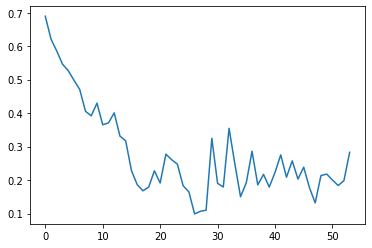

Epoch 1/100
28/28 - 6s - loss: 0.6806 - accuracy: 0.6027 - auc_23: 0.6347 - precision_23: 0.6065 - recall_23: 0.5122 - f1_score: 0.6527 - val_loss: 0.7017 - val_accuracy: 0.5067 - val_auc_23: 0.6735 - val_precision_23: 0.5067 - val_recall_23: 1.0000 - val_f1_score: 0.6726 - 6s/epoch - 218ms/step
Epoch 2/100
28/28 - 2s - loss: 0.6156 - accuracy: 0.6470 - auc_23: 0.7160 - precision_23: 0.6459 - recall_23: 0.6006 - f1_score: 0.6527 - val_loss: 0.7165 - val_accuracy: 0.4933 - val_auc_23: 0.6479 - val_precision_23: 0.5000 - val_recall_23: 0.9737 - val_f1_score: 0.6726 - 2s/epoch - 56ms/step
Epoch 3/100
28/28 - 2s - loss: 0.5669 - accuracy: 0.7075 - auc_23: 0.7795 - precision_23: 0.6868 - recall_23: 0.7287 - f1_score: 0.6527 - val_loss: 0.6903 - val_accuracy: 0.5333 - val_auc_23: 0.6696 - val_precision_23: 0.5231 - val_recall_23: 0.8947 - val_f1_score: 0.6726 - 2s/epoch - 64ms/step
Epoch 4/100
28/28 - 2s - loss: 0.5481 - accuracy: 0.7312 - auc_23: 0.8030 - precision_23: 0.7355 - recall_23: 0

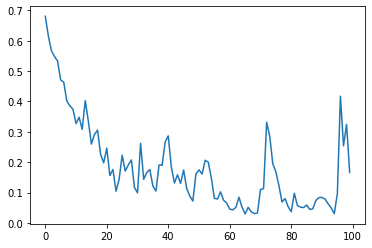

Epoch 1/100
28/28 - 6s - loss: 0.6780 - accuracy: 0.6248 - auc_24: 0.6525 - precision_24: 0.6307 - recall_24: 0.5778 - f1_score: 0.6607 - val_loss: 0.7001 - val_accuracy: 0.5733 - val_auc_24: 0.5065 - val_precision_24: 0.0000e+00 - val_recall_24: 0.0000e+00 - val_f1_score: 0.5981 - 6s/epoch - 215ms/step
Epoch 2/100
28/28 - 2s - loss: 0.6209 - accuracy: 0.6617 - auc_24: 0.7100 - precision_24: 0.6937 - recall_24: 0.5629 - f1_score: 0.6607 - val_loss: 0.8967 - val_accuracy: 0.4400 - val_auc_24: 0.5258 - val_precision_24: 0.4306 - val_recall_24: 0.9688 - val_f1_score: 0.5981 - 2s/epoch - 56ms/step
Epoch 3/100
28/28 - 2s - loss: 0.5843 - accuracy: 0.6780 - auc_24: 0.7476 - precision_24: 0.6986 - recall_24: 0.6108 - f1_score: 0.6607 - val_loss: 0.7910 - val_accuracy: 0.5200 - val_auc_24: 0.5745 - val_precision_24: 0.4500 - val_recall_24: 0.5625 - val_f1_score: 0.5981 - 2s/epoch - 56ms/step
Epoch 4/100
28/28 - 2s - loss: 0.5436 - accuracy: 0.7194 - auc_24: 0.7929 - precision_24: 0.7384 - reca

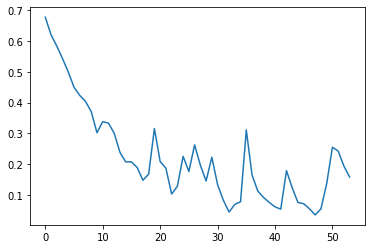

Epoch 1/100
28/28 - 6s - loss: 0.6959 - accuracy: 0.6027 - auc_25: 0.6044 - precision_25: 0.6042 - recall_25: 0.5289 - f1_score: 0.6541 - val_loss: 0.6520 - val_accuracy: 0.6133 - val_auc_25: 0.7276 - val_precision_25: 0.6667 - val_recall_25: 0.4324 - val_f1_score: 0.6607 - 6s/epoch - 206ms/step
Epoch 2/100
28/28 - 2s - loss: 0.6239 - accuracy: 0.6647 - auc_25: 0.7083 - precision_25: 0.7024 - recall_25: 0.5380 - f1_score: 0.6541 - val_loss: 0.7455 - val_accuracy: 0.4933 - val_auc_25: 0.7639 - val_precision_25: 0.4933 - val_recall_25: 1.0000 - val_f1_score: 0.6607 - 2s/epoch - 56ms/step
Epoch 3/100
28/28 - 2s - loss: 0.5951 - accuracy: 0.6691 - auc_25: 0.7461 - precision_25: 0.6636 - recall_25: 0.6474 - f1_score: 0.6541 - val_loss: 0.7714 - val_accuracy: 0.5333 - val_auc_25: 0.6860 - val_precision_25: 0.7500 - val_recall_25: 0.0811 - val_f1_score: 0.6607 - 2s/epoch - 56ms/step
Epoch 4/100
28/28 - 2s - loss: 0.5448 - accuracy: 0.7179 - auc_25: 0.7928 - precision_25: 0.7654 - recall_25: 0

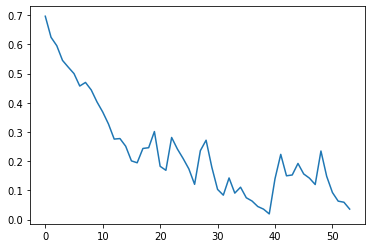

Epoch 1/100
28/28 - 6s - loss: 0.6780 - accuracy: 0.6027 - auc_26: 0.6374 - precision_26: 0.6105 - recall_26: 0.5241 - f1_score: 0.6581 - val_loss: 0.9851 - val_accuracy: 0.4533 - val_auc_26: 0.6966 - val_precision_26: 0.4533 - val_recall_26: 1.0000 - val_f1_score: 0.6239 - 6s/epoch - 206ms/step
Epoch 2/100
28/28 - 2s - loss: 0.6408 - accuracy: 0.6632 - auc_26: 0.6872 - precision_26: 0.6576 - recall_26: 0.6536 - f1_score: 0.6581 - val_loss: 0.5675 - val_accuracy: 0.7067 - val_auc_26: 0.7618 - val_precision_26: 0.7308 - val_recall_26: 0.5588 - val_f1_score: 0.6239 - 2s/epoch - 59ms/step
Epoch 3/100
28/28 - 1s - loss: 0.6046 - accuracy: 0.6736 - auc_26: 0.7284 - precision_26: 0.6975 - recall_26: 0.5904 - f1_score: 0.6581 - val_loss: 0.5840 - val_accuracy: 0.7200 - val_auc_26: 0.7629 - val_precision_26: 0.9333 - val_recall_26: 0.4118 - val_f1_score: 0.6239 - 1s/epoch - 51ms/step
Epoch 4/100
28/28 - 1s - loss: 0.5775 - accuracy: 0.7001 - auc_26: 0.7625 - precision_26: 0.7247 - recall_26: 0

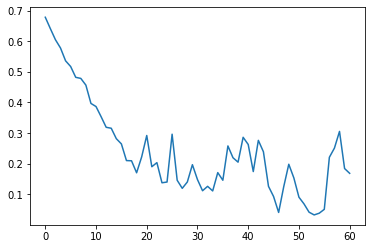

Epoch 1/100
28/28 - 6s - loss: 0.6857 - accuracy: 0.6086 - auc_27: 0.6250 - precision_27: 0.5976 - recall_27: 0.6103 - f1_score: 0.6567 - val_loss: 0.7692 - val_accuracy: 0.5333 - val_auc_27: 0.6861 - val_precision_27: 0.0000e+00 - val_recall_27: 0.0000e+00 - val_f1_score: 0.6364 - 6s/epoch - 222ms/step
Epoch 2/100
28/28 - 2s - loss: 0.6006 - accuracy: 0.6706 - auc_27: 0.7392 - precision_27: 0.6888 - recall_27: 0.5952 - f1_score: 0.6567 - val_loss: 0.6766 - val_accuracy: 0.6000 - val_auc_27: 0.6504 - val_precision_27: 0.5532 - val_recall_27: 0.7429 - val_f1_score: 0.6364 - 2s/epoch - 64ms/step
Epoch 3/100
28/28 - 2s - loss: 0.5684 - accuracy: 0.7031 - auc_27: 0.7738 - precision_27: 0.7273 - recall_27: 0.6284 - f1_score: 0.6567 - val_loss: 0.7922 - val_accuracy: 0.5467 - val_auc_27: 0.6886 - val_precision_27: 0.5082 - val_recall_27: 0.8857 - val_f1_score: 0.6364 - 2s/epoch - 57ms/step
Epoch 4/100
28/28 - 2s - loss: 0.5432 - accuracy: 0.7371 - auc_27: 0.7995 - precision_27: 0.7525 - reca

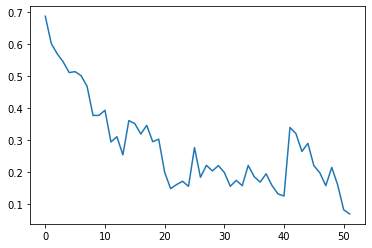

Epoch 1/100
28/28 - 6s - loss: 0.7406 - accuracy: 0.5923 - auc_28: 0.6119 - precision_28: 0.5976 - recall_28: 0.4615 - f1_score: 0.6487 - val_loss: 0.7241 - val_accuracy: 0.5467 - val_auc_28: 0.7174 - val_precision_28: 0.5467 - val_recall_28: 1.0000 - val_f1_score: 0.7069 - 6s/epoch - 206ms/step
Epoch 2/100
28/28 - 2s - loss: 0.6203 - accuracy: 0.6617 - auc_28: 0.7156 - precision_28: 0.6404 - recall_28: 0.6738 - f1_score: 0.6487 - val_loss: 0.6662 - val_accuracy: 0.6000 - val_auc_28: 0.6313 - val_precision_28: 0.6667 - val_recall_28: 0.5366 - val_f1_score: 0.7069 - 2s/epoch - 64ms/step
Epoch 3/100
28/28 - 2s - loss: 0.6004 - accuracy: 0.6854 - auc_28: 0.7415 - precision_28: 0.6750 - recall_28: 0.6646 - f1_score: 0.6487 - val_loss: 0.9248 - val_accuracy: 0.4800 - val_auc_28: 0.7152 - val_precision_28: 1.0000 - val_recall_28: 0.0488 - val_f1_score: 0.7069 - 2s/epoch - 57ms/step
Epoch 4/100
28/28 - 2s - loss: 0.5655 - accuracy: 0.7046 - auc_28: 0.7790 - precision_28: 0.7178 - recall_28: 0

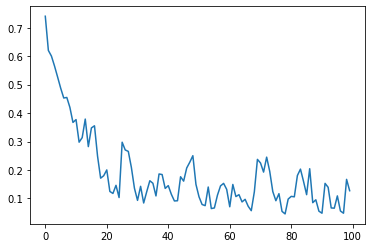

Epoch 1/100
28/28 - 6s - loss: 0.6966 - accuracy: 0.5953 - auc_29: 0.6206 - precision_29: 0.6070 - recall_29: 0.5164 - f1_score: 0.6621 - val_loss: 0.7759 - val_accuracy: 0.4533 - val_auc_29: 0.6518 - val_precision_29: 0.4306 - val_recall_29: 1.0000 - val_f1_score: 0.5849 - 6s/epoch - 219ms/step
Epoch 2/100
28/28 - 2s - loss: 0.6065 - accuracy: 0.6736 - auc_29: 0.7298 - precision_29: 0.6939 - recall_29: 0.6090 - f1_score: 0.6621 - val_loss: 0.6595 - val_accuracy: 0.6400 - val_auc_29: 0.6551 - val_precision_29: 0.7000 - val_recall_29: 0.2258 - val_f1_score: 0.5849 - 2s/epoch - 64ms/step
Epoch 3/100
28/28 - 2s - loss: 0.5618 - accuracy: 0.7105 - auc_29: 0.7816 - precision_29: 0.7439 - recall_29: 0.6328 - f1_score: 0.6621 - val_loss: 0.7334 - val_accuracy: 0.4400 - val_auc_29: 0.6789 - val_precision_29: 0.4127 - val_recall_29: 0.8387 - val_f1_score: 0.5849 - 2s/epoch - 56ms/step
Epoch 4/100
28/28 - 2s - loss: 0.5396 - accuracy: 0.7312 - auc_29: 0.8015 - precision_29: 0.7270 - recall_29: 0

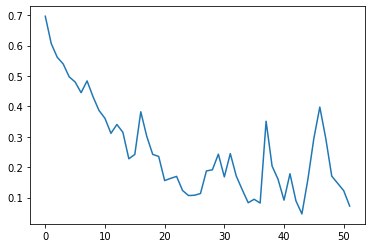

In [13]:
acc = 0.0
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    cnnlstm_binary_earlyfusion_model = CNNLSTM(n_features, None, n_length, n_outputs)
    history = cnnlstm_binary_earlyfusion_model.train(X_train, y_train, X_val, y_val, epochs, 25)
    plt.plot(history.history['loss'])
    plt.show()
    if history.history['accuracy'][-1] > acc:
        acc = history.history['accuracy'][-1]
        cnnlstm_binary_earlyfusion_model.save(model_path / 'early_binary_cnnlstm.h5')

In [14]:
cnnlstm_binary_earlyfusion_model = load_model(model_path / 'early_binary_cnnlstm.h5')
y_pred = cnnlstm_binary_earlyfusion_model.predict(X_test)
_, acc, auc, precision, recall, f1 = cnnlstm_binary_earlyfusion_model.evaluate(X_test, y_test)
cnn_auc.append(round(auc, 2))
print('Accuracy: {:.2f}% \nROC/AUC: {:.2f} \nPrecision: {:.2f} \nRecall: {:.2f} \nF1 score: {:.2f}'.format(acc * 100, auc, precision, recall, f1))

9/9 [==============================] - 1s 14ms/step - loss: 0.5775 - accuracy: 0.6828 - auc_25: 0.6389 - precision_25: 0.8925 - recall_25: 0.7186 - f1_score: 0.9259
Accuracy: 68.28% 
ROC/AUC: 0.64 
Precision: 0.89 
Recall: 0.72 
F1 score: 0.93


### RCNN

Epoch 1/100
66/66 - 3s - loss: 0.8727 - accuracy: 0.4898 - auc_130: 0.4877 - precision_130: 0.4970 - recall_130: 0.6127 - f1_score: 0.6723 - val_loss: 0.7954 - val_accuracy: 0.5021 - val_auc_130: 0.5001 - val_precision_130: 0.4978 - val_recall_130: 0.9914 - val_f1_score: 0.6610 - 3s/epoch - 42ms/step
Epoch 2/100
66/66 - 1s - loss: 0.6979 - accuracy: 0.5419 - auc_130: 0.5706 - precision_130: 0.5383 - recall_130: 0.6707 - f1_score: 0.6723 - val_loss: 0.8010 - val_accuracy: 0.5064 - val_auc_130: 0.5125 - val_precision_130: 0.5000 - val_recall_130: 1.0000 - val_f1_score: 0.6610 - 1s/epoch - 15ms/step
Epoch 3/100
66/66 - 1s - loss: 0.6893 - accuracy: 0.5348 - auc_130: 0.5732 - precision_130: 0.5425 - recall_130: 0.5192 - f1_score: 0.6723 - val_loss: 0.6807 - val_accuracy: 0.5106 - val_auc_130: 0.5210 - val_precision_130: 0.6667 - val_recall_130: 0.0172 - val_f1_score: 0.6610 - 1s/epoch - 16ms/step
Epoch 4/100
66/66 - 1s - loss: 0.6789 - accuracy: 0.5552 - auc_130: 0.5938 - precision_130: 0.

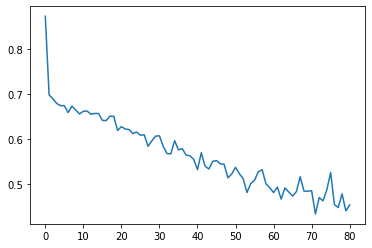

Epoch 1/100
66/66 - 2s - loss: 0.8120 - accuracy: 0.5083 - auc_131: 0.5235 - precision_131: 0.5117 - recall_131: 0.6342 - f1_score: 0.6723 - val_loss: 0.7452 - val_accuracy: 0.5021 - val_auc_131: 0.5211 - val_precision_131: 0.4979 - val_recall_131: 1.0000 - val_f1_score: 0.6610 - 2s/epoch - 35ms/step
Epoch 2/100
66/66 - 1s - loss: 0.7571 - accuracy: 0.5249 - auc_131: 0.5406 - precision_131: 0.5309 - recall_131: 0.5304 - f1_score: 0.6723 - val_loss: 0.6943 - val_accuracy: 0.5064 - val_auc_131: 0.4959 - val_precision_131: 0.5000 - val_recall_131: 0.0086 - val_f1_score: 0.6610 - 965ms/epoch - 15ms/step
Epoch 3/100
66/66 - 1s - loss: 0.6884 - accuracy: 0.5547 - auc_131: 0.5817 - precision_131: 0.5485 - recall_131: 0.6819 - f1_score: 0.6723 - val_loss: 0.6864 - val_accuracy: 0.4936 - val_auc_131: 0.5043 - val_precision_131: 0.4935 - val_recall_131: 0.9828 - val_f1_score: 0.6610 - 998ms/epoch - 15ms/step
Epoch 4/100
66/66 - 1s - loss: 0.6910 - accuracy: 0.5523 - auc_131: 0.5715 - precision_1

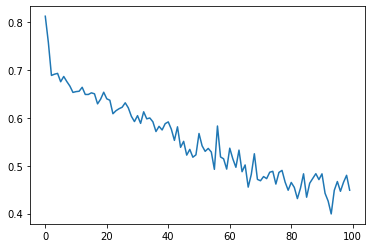

Epoch 1/100
66/66 - 2s - loss: 0.7836 - accuracy: 0.5088 - auc_132: 0.5136 - precision_132: 0.5137 - recall_132: 0.4746 - f1_score: 0.6702 - val_loss: 0.7690 - val_accuracy: 0.5149 - val_auc_132: 0.5047 - val_precision_132: 0.5153 - val_recall_132: 0.9752 - val_f1_score: 0.6798 - 2s/epoch - 36ms/step
Epoch 2/100
66/66 - 1s - loss: 0.7110 - accuracy: 0.5514 - auc_132: 0.5611 - precision_132: 0.5542 - recall_132: 0.5620 - f1_score: 0.6702 - val_loss: 0.6843 - val_accuracy: 0.4979 - val_auc_132: 0.5211 - val_precision_132: 1.0000 - val_recall_132: 0.0248 - val_f1_score: 0.6798 - 854ms/epoch - 13ms/step
Epoch 3/100
66/66 - 1s - loss: 0.6923 - accuracy: 0.5443 - auc_132: 0.5741 - precision_132: 0.5445 - recall_132: 0.5865 - f1_score: 0.6702 - val_loss: 0.6755 - val_accuracy: 0.5277 - val_auc_132: 0.5293 - val_precision_132: 0.5216 - val_recall_132: 1.0000 - val_f1_score: 0.6798 - 885ms/epoch - 13ms/step
Epoch 4/100
66/66 - 1s - loss: 0.6812 - accuracy: 0.5613 - auc_132: 0.5886 - precision_1

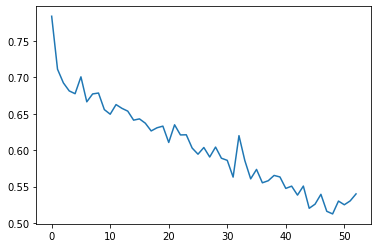

Epoch 1/100
66/66 - 2s - loss: 0.7581 - accuracy: 0.5272 - auc_133: 0.5411 - precision_133: 0.5374 - recall_133: 0.4771 - f1_score: 0.6725 - val_loss: 0.7330 - val_accuracy: 0.5064 - val_auc_133: 0.5083 - val_precision_133: 0.5000 - val_recall_133: 0.0172 - val_f1_score: 0.6610 - 2s/epoch - 35ms/step
Epoch 2/100
66/66 - 1s - loss: 0.7236 - accuracy: 0.5339 - auc_133: 0.5513 - precision_133: 0.5339 - recall_133: 0.6268 - f1_score: 0.6723 - val_loss: 0.7664 - val_accuracy: 0.5021 - val_auc_133: 0.5040 - val_precision_133: 0.4978 - val_recall_133: 0.9828 - val_f1_score: 0.6610 - 910ms/epoch - 14ms/step
Epoch 3/100
66/66 - 1s - loss: 0.6944 - accuracy: 0.5234 - auc_133: 0.5415 - precision_133: 0.5226 - recall_133: 0.6810 - f1_score: 0.6723 - val_loss: 0.7739 - val_accuracy: 0.4979 - val_auc_133: 0.5001 - val_precision_133: 0.4957 - val_recall_133: 1.0000 - val_f1_score: 0.6610 - 804ms/epoch - 12ms/step
Epoch 4/100
66/66 - 1s - loss: 0.7099 - accuracy: 0.5343 - auc_133: 0.5585 - precision_1

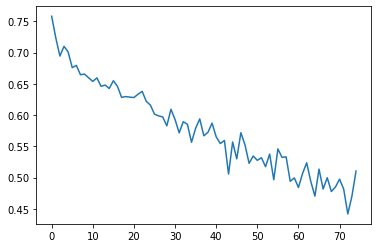

Epoch 1/100
66/66 - 3s - loss: 0.7777 - accuracy: 0.5253 - auc_134: 0.5373 - precision_134: 0.5289 - recall_134: 0.5418 - f1_score: 0.6707 - val_loss: 0.7122 - val_accuracy: 0.4979 - val_auc_134: 0.5125 - val_precision_134: 0.7500 - val_recall_134: 0.0250 - val_f1_score: 0.6761 - 3s/epoch - 41ms/step
Epoch 2/100
66/66 - 1s - loss: 0.7338 - accuracy: 0.5007 - auc_134: 0.5224 - precision_134: 0.5063 - recall_134: 0.4178 - f1_score: 0.6707 - val_loss: 0.7104 - val_accuracy: 0.5106 - val_auc_134: 0.5048 - val_precision_134: 0.5109 - val_recall_134: 0.9750 - val_f1_score: 0.6761 - 880ms/epoch - 13ms/step
Epoch 3/100
66/66 - 1s - loss: 0.7003 - accuracy: 0.5481 - auc_134: 0.5728 - precision_134: 0.5523 - recall_134: 0.5502 - f1_score: 0.6707 - val_loss: 0.6924 - val_accuracy: 0.5191 - val_auc_134: 0.5384 - val_precision_134: 0.5150 - val_recall_134: 1.0000 - val_f1_score: 0.6761 - 973ms/epoch - 15ms/step
Epoch 4/100
66/66 - 1s - loss: 0.6917 - accuracy: 0.5495 - auc_134: 0.5757 - precision_1

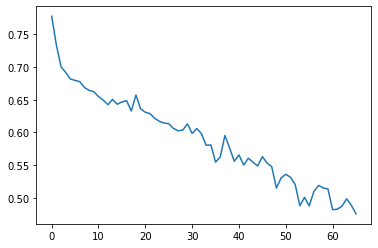

Epoch 1/100
66/66 - 2s - loss: 0.7798 - accuracy: 0.5367 - auc_135: 0.5435 - precision_135: 0.5348 - recall_135: 0.6341 - f1_score: 0.6711 - val_loss: 0.6828 - val_accuracy: 0.5149 - val_auc_135: 0.5170 - val_precision_135: 0.5108 - val_recall_135: 0.9916 - val_f1_score: 0.6723 - 2s/epoch - 36ms/step
Epoch 2/100
66/66 - 1s - loss: 0.7249 - accuracy: 0.5509 - auc_135: 0.5653 - precision_135: 0.5537 - recall_135: 0.5704 - f1_score: 0.6711 - val_loss: 0.6799 - val_accuracy: 0.5191 - val_auc_135: 0.5253 - val_precision_135: 0.5130 - val_recall_135: 0.9916 - val_f1_score: 0.6723 - 960ms/epoch - 15ms/step
Epoch 3/100
66/66 - 1s - loss: 0.7117 - accuracy: 0.5258 - auc_135: 0.5536 - precision_135: 0.5249 - recall_135: 0.6417 - f1_score: 0.6711 - val_loss: 0.7314 - val_accuracy: 0.5191 - val_auc_135: 0.5249 - val_precision_135: 0.5129 - val_recall_135: 1.0000 - val_f1_score: 0.6723 - 869ms/epoch - 13ms/step
Epoch 4/100
66/66 - 1s - loss: 0.6803 - accuracy: 0.5377 - auc_135: 0.5833 - precision_1

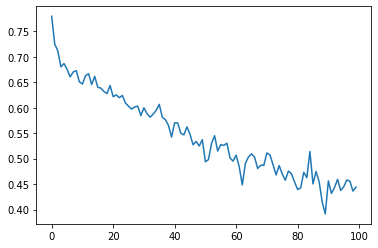

Epoch 1/100
66/66 - 2s - loss: 0.9527 - accuracy: 0.5161 - auc_136: 0.5170 - precision_136: 0.5164 - recall_136: 0.5651 - f1_score: 0.6683 - val_loss: 0.7271 - val_accuracy: 0.5385 - val_auc_136: 0.4993 - val_precision_136: 0.5365 - val_recall_136: 1.0000 - val_f1_score: 0.6964 - 2s/epoch - 34ms/step
Epoch 2/100
66/66 - 1s - loss: 0.6972 - accuracy: 0.5445 - auc_136: 0.5631 - precision_136: 0.5425 - recall_136: 0.5896 - f1_score: 0.6683 - val_loss: 0.7110 - val_accuracy: 0.4615 - val_auc_136: 0.5046 - val_precision_136: 0.3333 - val_recall_136: 0.0080 - val_f1_score: 0.6964 - 845ms/epoch - 13ms/step
Epoch 3/100
66/66 - 1s - loss: 0.6876 - accuracy: 0.5469 - auc_136: 0.5891 - precision_136: 0.5408 - recall_136: 0.6443 - f1_score: 0.6683 - val_loss: 0.7111 - val_accuracy: 0.4615 - val_auc_136: 0.4994 - val_precision_136: 0.3333 - val_recall_136: 0.0080 - val_f1_score: 0.6964 - 815ms/epoch - 12ms/step
Epoch 4/100
66/66 - 1s - loss: 0.6925 - accuracy: 0.5483 - auc_136: 0.5721 - precision_1

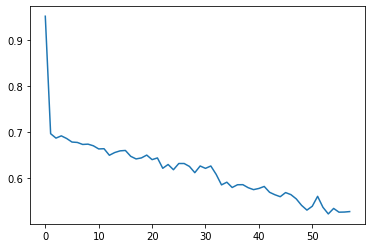

Epoch 1/100
66/66 - 2s - loss: 0.8368 - accuracy: 0.5085 - auc_137: 0.5162 - precision_137: 0.5212 - recall_137: 0.4894 - f1_score: 0.6771 - val_loss: 0.7184 - val_accuracy: 0.5556 - val_auc_137: 0.4914 - val_precision_137: 0.5000 - val_recall_137: 0.0096 - val_f1_score: 0.6154 - 2s/epoch - 33ms/step
Epoch 2/100
66/66 - 1s - loss: 0.7022 - accuracy: 0.5336 - auc_137: 0.5474 - precision_137: 0.5380 - recall_137: 0.6290 - f1_score: 0.6771 - val_loss: 0.7531 - val_accuracy: 0.4359 - val_auc_137: 0.4914 - val_precision_137: 0.4397 - val_recall_137: 0.9808 - val_f1_score: 0.6154 - 798ms/epoch - 12ms/step
Epoch 3/100
66/66 - 1s - loss: 0.6966 - accuracy: 0.5393 - auc_137: 0.5692 - precision_137: 0.5346 - recall_137: 0.7724 - f1_score: 0.6771 - val_loss: 0.7433 - val_accuracy: 0.4359 - val_auc_137: 0.4914 - val_precision_137: 0.4397 - val_recall_137: 0.9808 - val_f1_score: 0.6154 - 832ms/epoch - 13ms/step
Epoch 4/100
66/66 - 1s - loss: 0.6895 - accuracy: 0.5573 - auc_137: 0.5748 - precision_1

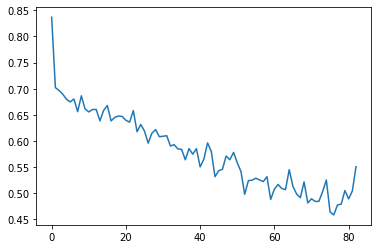

Epoch 1/100
66/66 - 2s - loss: 0.8100 - accuracy: 0.5303 - auc_138: 0.5389 - precision_138: 0.5327 - recall_138: 0.5587 - f1_score: 0.6704 - val_loss: 1.0222 - val_accuracy: 0.4872 - val_auc_138: 0.4878 - val_precision_138: 0.0000e+00 - val_recall_138: 0.0000e+00 - val_f1_score: 0.6742 - 2s/epoch - 33ms/step
Epoch 2/100
66/66 - 1s - loss: 0.7359 - accuracy: 0.5308 - auc_138: 0.5491 - precision_138: 0.5365 - recall_138: 0.5108 - f1_score: 0.6704 - val_loss: 0.6901 - val_accuracy: 0.4957 - val_auc_138: 0.5044 - val_precision_138: 1.0000 - val_recall_138: 0.0167 - val_f1_score: 0.6780 - 827ms/epoch - 13ms/step
Epoch 3/100
66/66 - 1s - loss: 0.7052 - accuracy: 0.5237 - auc_138: 0.5393 - precision_138: 0.5276 - recall_138: 0.5286 - f1_score: 0.6704 - val_loss: 0.6898 - val_accuracy: 0.5000 - val_auc_138: 0.5126 - val_precision_138: 1.0000 - val_recall_138: 0.0250 - val_f1_score: 0.6780 - 870ms/epoch - 13ms/step
Epoch 4/100
66/66 - 1s - loss: 0.6855 - accuracy: 0.5488 - auc_138: 0.5826 - pre

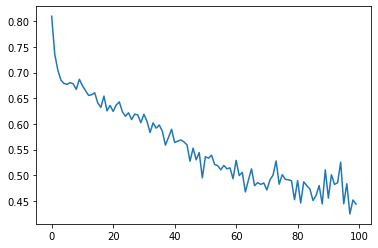

Epoch 1/100
66/66 - 3s - loss: 0.7981 - accuracy: 0.5038 - auc_139: 0.5121 - precision_139: 0.5042 - recall_139: 0.5071 - f1_score: 0.6671 - val_loss: 0.7250 - val_accuracy: 0.5470 - val_auc_139: 0.4954 - val_precision_139: 0.5474 - val_recall_139: 0.9922 - val_f1_score: 0.7072 - 3s/epoch - 39ms/step
Epoch 2/100
66/66 - 1s - loss: 0.7057 - accuracy: 0.5189 - auc_139: 0.5424 - precision_139: 0.5198 - recall_139: 0.5090 - f1_score: 0.6671 - val_loss: 0.6939 - val_accuracy: 0.5556 - val_auc_139: 0.5125 - val_precision_139: 0.5517 - val_recall_139: 1.0000 - val_f1_score: 0.7072 - 816ms/epoch - 12ms/step
Epoch 3/100
66/66 - 1s - loss: 0.6966 - accuracy: 0.5346 - auc_139: 0.5543 - precision_139: 0.5421 - recall_139: 0.4503 - f1_score: 0.6671 - val_loss: 0.6949 - val_accuracy: 0.4573 - val_auc_139: 0.5123 - val_precision_139: 0.6667 - val_recall_139: 0.0156 - val_f1_score: 0.7072 - 819ms/epoch - 12ms/step
Epoch 4/100
66/66 - 1s - loss: 0.6851 - accuracy: 0.5232 - auc_139: 0.5630 - precision_1

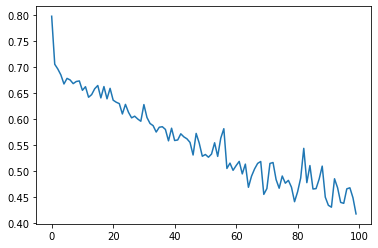

In [75]:
acc = 0.0
for train_index, val_index in kf.split(full_X):
    X_train, X_val = full_X[train_index], full_X[val_index]
    y_train, y_val = full_y[train_index], full_y[val_index]
    rcnn_binary_earlyfusion_model = RCNN(n_features, None, n_length, n_outputs)
    history = rcnn_binary_earlyfusion_model.train(X_train, y_train, X_val, y_val, epochs=epochs, batch_size=32)
    plt.plot(history.history['loss'])
    plt.show()
    if history.history['accuracy'][-1] > acc:
        acc = history.history['accuracy'][-1]
        rcnn_binary_earlyfusion_model.save(model_path / 'early_binary_rcnn.h5')

In [76]:
rcnn_binary_earlyfusion_model = load_model(model_path / 'early_binary_rcnn.h5')
y_pred = rcnn_binary_earlyfusion_model.predict(X_test)
_, acc, auc, precision, recall, f1 = rcnn_binary_earlyfusion_model.evaluate(X_test, y_test)
rnn_auc.append(round(auc, 2))
print('Accuracy: {:.2f}% \nROC/AUC: {:.2f} \nPrecision: {:.2f} \nRecall: {:.2f} \nF1 score: {:.2f}'.format(acc * 100, auc, precision, recall, f1))

8/8 [==============================] - 0s 10ms/step - loss: 0.7574 - accuracy: 0.1975 - auc_139: 0.5353 - precision_139: 1.0000 - recall_139: 0.0545 - f1_score: 0.9182
Accuracy: 19.75% 
ROC/AUC: 0.54 
Precision: 1.00 
Recall: 0.05 
F1 score: 0.92


## 3. Multimodal Late Fusion

### Apply Data Augmentation

In [77]:
body_X_train, body_X_test, body_y_train, body_y_test = load_dataset('skeleton', binary=True, fusion=True)
body_X = body_X_train.copy()
body_y = body_y_train.copy()

print(body_X_train.shape, body_y_train.shape)
print(body_X_test.shape, body_y_test.shape)

(782, 1, 350, 35) (782, 1)
(238, 1, 350, 35) (238, 1)


In [78]:
face_X_train, face_X_test, face_y_train, face_y_test = load_dataset('AUs', binary=True)
face_X = face_X_train.copy()
face_y = face_y_train.copy()

print(face_X_train.shape, face_y_train.shape)
print(face_X_test.shape, face_y_test.shape)

(782, 1, 350, 25) (782, 1)
(238, 1, 350, 25) (238, 1)


In [79]:
n_length, body_features, face_features, n_outputs = face_X_train.shape[2], body_X_train.shape[-1], face_X_train.shape[-1], body_y_train.shape[1]

In [80]:
jitter_X = jitter(body_X, sigma=0.03)

In [81]:
reshaped_X = body_X.reshape((body_X.shape[0], body_X.shape[2], body_X.shape[-1]))
rotated_X = rotation(reshaped_X)
rotated_X = rotated_X.reshape((rotated_X.shape[0], 1, rotated_X.shape[1], rotated_X.shape[-1]))

In [82]:
augmented_X = np.concatenate((rotated_X, jitter_X), axis=0)
add_y = np.concatenate((y, y), axis=0)
body_X = np.concatenate((augmented_X, body_X), axis=0)
y = np.concatenate((add_y, y), axis=0) 
body_X.shape

(2346, 1, 350, 35)

In [83]:
jitter_X = jitter(face_X, sigma=0.03)

In [84]:
reshaped_X = face_X.reshape((face_X.shape[0], face_X.shape[2], face_X.shape[-1]))
rotated_X = rotation(reshaped_X)
rotated_X = rotated_X.reshape((rotated_X.shape[0], 1, rotated_X.shape[1], rotated_X.shape[-1]))

In [85]:
augmented_X = np.concatenate((rotated_X, jitter_X), axis=0)
face_X = np.concatenate((augmented_X, face_X), axis=0)
face_X.shape

(2346, 1, 350, 25)

### CNN + BiLSTM

Epoch 1/100
85/85 - 7s - loss: 0.6914 - accuracy: 0.5756 - auc_140: 0.6070 - precision_140: 0.5783 - recall_140: 0.5978 - f1_score: 0.6723 - val_loss: 0.6509 - val_accuracy: 0.5872 - val_auc_140: 0.7089 - val_precision_140: 0.5477 - val_recall_140: 0.9397 - val_f1_score: 0.6610 - 7s/epoch - 84ms/step
Epoch 2/100
85/85 - 3s - loss: 0.6300 - accuracy: 0.6400 - auc_140: 0.6959 - precision_140: 0.6293 - recall_140: 0.7035 - f1_score: 0.6723 - val_loss: 0.6549 - val_accuracy: 0.6213 - val_auc_140: 0.6895 - val_precision_140: 0.7077 - val_recall_140: 0.3966 - val_f1_score: 0.6610 - 3s/epoch - 33ms/step
Epoch 3/100
85/85 - 3s - loss: 0.6011 - accuracy: 0.6679 - auc_140: 0.7324 - precision_140: 0.6710 - recall_140: 0.6754 - f1_score: 0.6723 - val_loss: 0.6046 - val_accuracy: 0.6766 - val_auc_140: 0.7414 - val_precision_140: 0.6389 - val_recall_140: 0.7931 - val_f1_score: 0.6610 - 3s/epoch - 34ms/step
Epoch 4/100
85/85 - 3s - loss: 0.5511 - accuracy: 0.7148 - auc_140: 0.7857 - precision_140: 0.

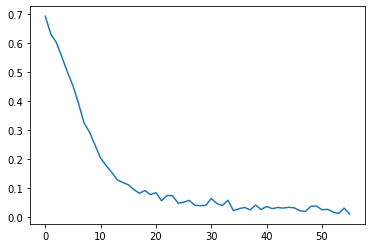

Epoch 1/100
85/85 - 8s - loss: 0.6951 - accuracy: 0.5685 - auc_141: 0.6134 - precision_141: 0.5757 - recall_141: 0.5622 - f1_score: 0.6723 - val_loss: 0.6679 - val_accuracy: 0.6255 - val_auc_141: 0.6530 - val_precision_141: 0.5972 - val_recall_141: 0.7414 - val_f1_score: 0.6610 - 8s/epoch - 96ms/step
Epoch 2/100
85/85 - 3s - loss: 0.6262 - accuracy: 0.6319 - auc_141: 0.6945 - precision_141: 0.6390 - recall_141: 0.6277 - f1_score: 0.6723 - val_loss: 0.6568 - val_accuracy: 0.6255 - val_auc_141: 0.6797 - val_precision_141: 0.6892 - val_recall_141: 0.4397 - val_f1_score: 0.6610 - 3s/epoch - 39ms/step
Epoch 3/100
85/85 - 4s - loss: 0.5891 - accuracy: 0.6684 - auc_141: 0.7443 - precision_141: 0.6716 - recall_141: 0.6754 - f1_score: 0.6723 - val_loss: 0.6173 - val_accuracy: 0.6681 - val_auc_141: 0.7285 - val_precision_141: 0.6759 - val_recall_141: 0.6293 - val_f1_score: 0.6610 - 4s/epoch - 42ms/step
Epoch 4/100
85/85 - 3s - loss: 0.5561 - accuracy: 0.7077 - auc_141: 0.7827 - precision_141: 0.

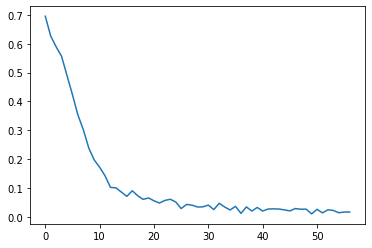

Epoch 1/100
85/85 - 8s - loss: 0.7017 - accuracy: 0.5666 - auc_142: 0.5949 - precision_142: 0.5728 - recall_142: 0.5508 - f1_score: 0.6702 - val_loss: 0.7161 - val_accuracy: 0.5149 - val_auc_142: 0.6738 - val_precision_142: 0.5149 - val_recall_142: 1.0000 - val_f1_score: 0.6798 - 8s/epoch - 90ms/step
Epoch 2/100
85/85 - 3s - loss: 0.6337 - accuracy: 0.6324 - auc_142: 0.6877 - precision_142: 0.6338 - recall_142: 0.6410 - f1_score: 0.6702 - val_loss: 0.6506 - val_accuracy: 0.6255 - val_auc_142: 0.6614 - val_precision_142: 0.6486 - val_recall_142: 0.5950 - val_f1_score: 0.6798 - 3s/epoch - 37ms/step
Epoch 3/100
85/85 - 3s - loss: 0.5941 - accuracy: 0.6760 - auc_142: 0.7468 - precision_142: 0.6830 - recall_142: 0.6664 - f1_score: 0.6702 - val_loss: 0.6207 - val_accuracy: 0.6638 - val_auc_142: 0.7130 - val_precision_142: 0.6364 - val_recall_142: 0.8099 - val_f1_score: 0.6798 - 3s/epoch - 37ms/step
Epoch 4/100
85/85 - 3s - loss: 0.5473 - accuracy: 0.7158 - auc_142: 0.7928 - precision_142: 0.

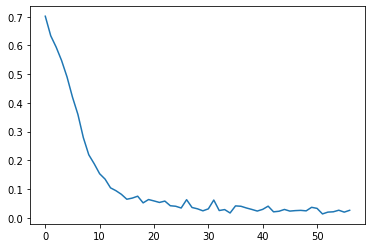

Epoch 1/100
85/85 - 8s - loss: 0.6898 - accuracy: 0.5647 - auc_143: 0.6039 - precision_143: 0.5693 - recall_143: 0.5762 - f1_score: 0.6723 - val_loss: 0.7039 - val_accuracy: 0.4851 - val_auc_143: 0.5594 - val_precision_143: 0.4667 - val_recall_143: 0.3017 - val_f1_score: 0.6610 - 8s/epoch - 94ms/step
Epoch 2/100
85/85 - 3s - loss: 0.6264 - accuracy: 0.6405 - auc_143: 0.6977 - precision_143: 0.6391 - recall_143: 0.6660 - f1_score: 0.6723 - val_loss: 0.6641 - val_accuracy: 0.5745 - val_auc_143: 0.6405 - val_precision_143: 0.5678 - val_recall_143: 0.5776 - val_f1_score: 0.6610 - 3s/epoch - 37ms/step
Epoch 3/100
85/85 - 3s - loss: 0.5836 - accuracy: 0.6722 - auc_143: 0.7524 - precision_143: 0.6757 - recall_143: 0.6782 - f1_score: 0.6723 - val_loss: 0.6455 - val_accuracy: 0.6468 - val_auc_143: 0.6983 - val_precision_143: 0.6897 - val_recall_143: 0.5172 - val_f1_score: 0.6610 - 3s/epoch - 38ms/step
Epoch 4/100
85/85 - 3s - loss: 0.5350 - accuracy: 0.7191 - auc_143: 0.8027 - precision_143: 0.

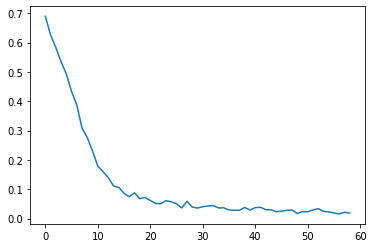

Epoch 1/100
85/85 - 8s - loss: 0.6829 - accuracy: 0.5912 - auc_144: 0.6268 - precision_144: 0.5923 - recall_144: 0.6085 - f1_score: 0.6707 - val_loss: 0.6763 - val_accuracy: 0.5660 - val_auc_144: 0.6196 - val_precision_144: 0.5474 - val_recall_144: 0.8667 - val_f1_score: 0.6761 - 8s/epoch - 90ms/step
Epoch 2/100
85/85 - 3s - loss: 0.6207 - accuracy: 0.6371 - auc_144: 0.7027 - precision_144: 0.6414 - recall_144: 0.6366 - f1_score: 0.6707 - val_loss: 0.6104 - val_accuracy: 0.6128 - val_auc_144: 0.7011 - val_precision_144: 0.6043 - val_recall_144: 0.7000 - val_f1_score: 0.6761 - 3s/epoch - 38ms/step
Epoch 3/100
85/85 - 3s - loss: 0.5652 - accuracy: 0.6997 - auc_144: 0.7749 - precision_144: 0.7035 - recall_144: 0.6995 - f1_score: 0.6707 - val_loss: 0.6540 - val_accuracy: 0.6383 - val_auc_144: 0.6897 - val_precision_144: 0.6159 - val_recall_144: 0.7750 - val_f1_score: 0.6761 - 3s/epoch - 35ms/step
Epoch 4/100
85/85 - 3s - loss: 0.5099 - accuracy: 0.7395 - auc_144: 0.8249 - precision_144: 0.

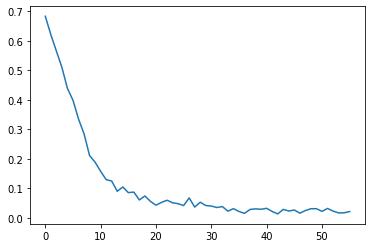

Epoch 1/100
85/85 - 8s - loss: 0.6953 - accuracy: 0.5694 - auc_145: 0.6064 - precision_145: 0.5737 - recall_145: 0.5732 - f1_score: 0.6711 - val_loss: 0.6766 - val_accuracy: 0.5702 - val_auc_145: 0.6107 - val_precision_145: 0.6286 - val_recall_145: 0.3697 - val_f1_score: 0.6723 - 8s/epoch - 90ms/step
Epoch 2/100
85/85 - 3s - loss: 0.6236 - accuracy: 0.6447 - auc_145: 0.7031 - precision_145: 0.6552 - recall_145: 0.6257 - f1_score: 0.6711 - val_loss: 0.6281 - val_accuracy: 0.6340 - val_auc_145: 0.6812 - val_precision_145: 0.6078 - val_recall_145: 0.7815 - val_f1_score: 0.6723 - 3s/epoch - 37ms/step
Epoch 3/100
85/85 - 3s - loss: 0.5807 - accuracy: 0.6793 - auc_145: 0.7562 - precision_145: 0.6837 - recall_145: 0.6792 - f1_score: 0.6711 - val_loss: 0.6194 - val_accuracy: 0.6468 - val_auc_145: 0.7655 - val_precision_145: 0.5978 - val_recall_145: 0.9244 - val_f1_score: 0.6723 - 3s/epoch - 37ms/step
Epoch 4/100
85/85 - 3s - loss: 0.5345 - accuracy: 0.7305 - auc_145: 0.8056 - precision_145: 0.

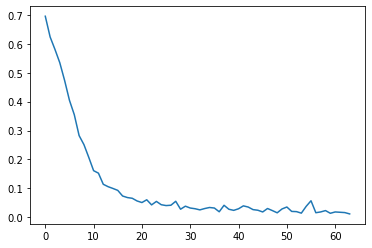

Epoch 1/100
85/85 - 8s - loss: 0.6940 - accuracy: 0.5639 - auc_146: 0.5959 - precision_146: 0.5631 - recall_146: 0.5849 - f1_score: 0.6683 - val_loss: 0.6515 - val_accuracy: 0.6111 - val_auc_146: 0.7234 - val_precision_146: 0.8036 - val_recall_146: 0.3600 - val_f1_score: 0.6964 - 8s/epoch - 92ms/step
Epoch 2/100
85/85 - 3s - loss: 0.6370 - accuracy: 0.6241 - auc_146: 0.6856 - precision_146: 0.6250 - recall_146: 0.6274 - f1_score: 0.6683 - val_loss: 0.6391 - val_accuracy: 0.6197 - val_auc_146: 0.6913 - val_precision_146: 0.6023 - val_recall_146: 0.8480 - val_f1_score: 0.6964 - 3s/epoch - 39ms/step
Epoch 3/100
85/85 - 3s - loss: 0.5958 - accuracy: 0.6761 - auc_146: 0.7434 - precision_146: 0.6797 - recall_146: 0.6708 - f1_score: 0.6683 - val_loss: 0.6475 - val_accuracy: 0.6453 - val_auc_146: 0.7220 - val_precision_146: 0.7442 - val_recall_146: 0.5120 - val_f1_score: 0.6964 - 3s/epoch - 36ms/step
Epoch 4/100
85/85 - 3s - loss: 0.5671 - accuracy: 0.6960 - auc_146: 0.7740 - precision_146: 0.

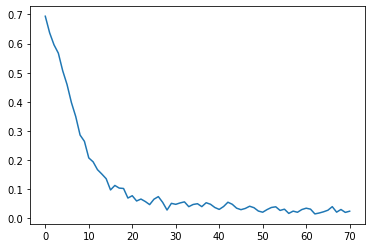

Epoch 1/100
85/85 - 8s - loss: 0.6894 - accuracy: 0.5507 - auc_147: 0.5862 - precision_147: 0.5607 - recall_147: 0.5643 - f1_score: 0.6771 - val_loss: 0.7407 - val_accuracy: 0.5556 - val_auc_147: 0.6445 - val_precision_147: 0.5000 - val_recall_147: 0.8654 - val_f1_score: 0.6154 - 8s/epoch - 92ms/step
Epoch 2/100
85/85 - 3s - loss: 0.6483 - accuracy: 0.6217 - auc_147: 0.6706 - precision_147: 0.6248 - recall_147: 0.6531 - f1_score: 0.6771 - val_loss: 0.6287 - val_accuracy: 0.6111 - val_auc_147: 0.6927 - val_precision_147: 0.5867 - val_recall_147: 0.4231 - val_f1_score: 0.6154 - 3s/epoch - 38ms/step
Epoch 3/100
85/85 - 3s - loss: 0.6070 - accuracy: 0.6695 - auc_147: 0.7282 - precision_147: 0.6749 - recall_147: 0.6836 - f1_score: 0.6771 - val_loss: 0.6098 - val_accuracy: 0.6581 - val_auc_147: 0.7189 - val_precision_147: 0.6304 - val_recall_147: 0.5577 - val_f1_score: 0.6154 - 3s/epoch - 37ms/step
Epoch 4/100
85/85 - 3s - loss: 0.5580 - accuracy: 0.7055 - auc_147: 0.7846 - precision_147: 0.

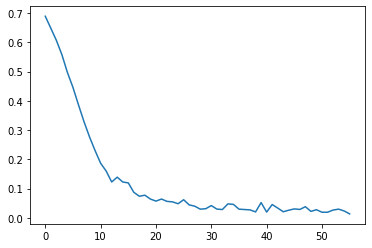

Epoch 1/100
85/85 - 8s - loss: 0.7010 - accuracy: 0.5601 - auc_148: 0.5883 - precision_148: 0.5648 - recall_148: 0.5568 - f1_score: 0.6704 - val_loss: 0.7136 - val_accuracy: 0.5128 - val_auc_148: 0.5818 - val_precision_148: 0.5156 - val_recall_148: 0.8250 - val_f1_score: 0.6780 - 8s/epoch - 90ms/step
Epoch 2/100
85/85 - 3s - loss: 0.6304 - accuracy: 0.6269 - auc_148: 0.6937 - precision_148: 0.6303 - recall_148: 0.6291 - f1_score: 0.6704 - val_loss: 0.6188 - val_accuracy: 0.6538 - val_auc_148: 0.7207 - val_precision_148: 0.7010 - val_recall_148: 0.5667 - val_f1_score: 0.6780 - 3s/epoch - 33ms/step
Epoch 3/100
85/85 - 3s - loss: 0.5834 - accuracy: 0.6875 - auc_148: 0.7551 - precision_148: 0.6866 - recall_148: 0.6995 - f1_score: 0.6704 - val_loss: 0.6309 - val_accuracy: 0.6581 - val_auc_148: 0.7450 - val_precision_148: 0.7941 - val_recall_148: 0.4500 - val_f1_score: 0.6780 - 3s/epoch - 32ms/step
Epoch 4/100
85/85 - 3s - loss: 0.5372 - accuracy: 0.7330 - auc_148: 0.8052 - precision_148: 0.

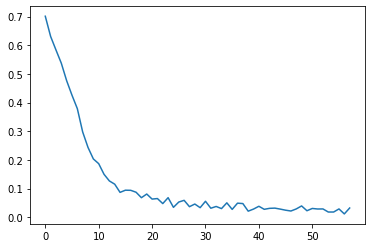

Epoch 1/100
85/85 - 8s - loss: 0.6979 - accuracy: 0.5819 - auc_149: 0.6046 - precision_149: 0.5813 - recall_149: 0.5885 - f1_score: 0.6671 - val_loss: 0.6376 - val_accuracy: 0.6325 - val_auc_149: 0.6889 - val_precision_149: 0.6207 - val_recall_149: 0.8438 - val_f1_score: 0.7072 - 8s/epoch - 93ms/step
Epoch 2/100
85/85 - 3s - loss: 0.6298 - accuracy: 0.6411 - auc_149: 0.7007 - precision_149: 0.6380 - recall_149: 0.6537 - f1_score: 0.6671 - val_loss: 0.6465 - val_accuracy: 0.5897 - val_auc_149: 0.6953 - val_precision_149: 0.6667 - val_recall_149: 0.5000 - val_f1_score: 0.7072 - 3s/epoch - 37ms/step
Epoch 3/100
85/85 - 3s - loss: 0.5867 - accuracy: 0.6913 - auc_149: 0.7560 - precision_149: 0.6909 - recall_149: 0.6935 - f1_score: 0.6671 - val_loss: 0.6441 - val_accuracy: 0.6325 - val_auc_149: 0.6836 - val_precision_149: 0.6235 - val_recall_149: 0.8281 - val_f1_score: 0.7072 - 3s/epoch - 39ms/step
Epoch 4/100
85/85 - 3s - loss: 0.5393 - accuracy: 0.7263 - auc_149: 0.8034 - precision_149: 0.

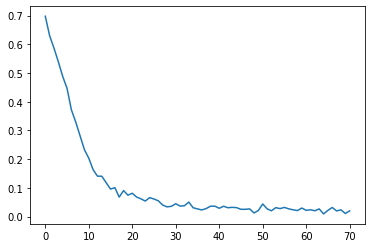

In [86]:
acc = 0.0
for train_index, val_index in kf.split(body_X):
    body_X_train, body_X_val = body_X[train_index], body_X[val_index]
    face_X_train, face_X_val = face_X[train_index], face_X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    cnnlstm_binary_latefusion_model = CNNLSTM(body_features, face_features, n_length, n_outputs, fusion=True)
    history = cnnlstm_binary_latefusion_model.trainFusioned(body_X_train, face_X_train, y_train, body_X_val, face_X_val, y_val, epochs=epochs, batch_size=25)
    plt.plot(history.history['loss'])
    plt.show()
    if history.history['accuracy'][-1] > acc:
        acc = history.history['accuracy'][-1]
        cnnlstm_binary_latefusion_model.save(model_path / 'late_binary_cnnlstm.h5')

In [87]:
cnnlstm_binary_latefusion_model = load_model(model_path / 'late_binary_cnnlstm.h5')
y_pred = cnnlstm_binary_latefusion_model.predict([body_X_test, face_X_test])
_, acc, auc, precision, recall, f1 = cnnlstm_binary_latefusion_model.evaluate([body_X_test, face_X_test], y_test)
cnn_auc.append(round(auc, 2))
print('Accuracy: {:.2f}% \nROC/AUC: {:.2f} \nPrecision: {:.2f} \nRecall: {:.2f} \nF1 score: {:.2f}'.format(acc * 100, auc, precision, recall, f1))

8/8 [==============================] - 1s 14ms/step - loss: 1.0102 - accuracy: 0.5420 - auc_147: 0.7314 - precision_147: 0.9515 - recall_147: 0.4851 - f1_score: 0.9182
Accuracy: 54.20% 
ROC/AUC: 0.73 
Precision: 0.95 
Recall: 0.49 
F1 score: 0.92


### RCNN

Epoch 1/100
66/66 - 2s - loss: 0.7126 - accuracy: 0.5827 - auc_150: 0.6044 - precision_150: 0.5845 - recall_150: 0.6080 - f1_score: 0.6723 - val_loss: 0.8296 - val_accuracy: 0.5489 - val_auc_150: 0.5943 - val_precision_150: 0.5316 - val_recall_150: 0.7241 - val_f1_score: 0.6610 - 2s/epoch - 37ms/step
Epoch 2/100
66/66 - 1s - loss: 0.6549 - accuracy: 0.6187 - auc_150: 0.6686 - precision_150: 0.6204 - recall_150: 0.6361 - f1_score: 0.6723 - val_loss: 0.7828 - val_accuracy: 0.5362 - val_auc_150: 0.6371 - val_precision_150: 0.5189 - val_recall_150: 0.8276 - val_f1_score: 0.6610 - 934ms/epoch - 14ms/step
Epoch 3/100
66/66 - 1s - loss: 0.6368 - accuracy: 0.6423 - auc_150: 0.6945 - precision_150: 0.6459 - recall_150: 0.6501 - f1_score: 0.6723 - val_loss: 0.6903 - val_accuracy: 0.5745 - val_auc_150: 0.6477 - val_precision_150: 0.5435 - val_recall_150: 0.8621 - val_f1_score: 0.6610 - 919ms/epoch - 14ms/step
Epoch 4/100
66/66 - 1s - loss: 0.6398 - accuracy: 0.6466 - auc_150: 0.6937 - precision_1

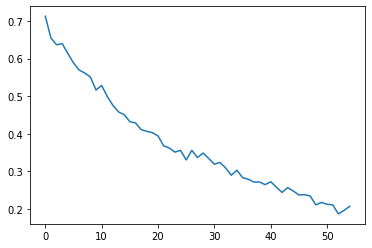

Epoch 1/100
66/66 - 2s - loss: 0.7033 - accuracy: 0.5703 - auc_151: 0.5871 - precision_151: 0.5713 - recall_151: 0.6071 - f1_score: 0.6723 - val_loss: 0.9020 - val_accuracy: 0.4894 - val_auc_151: 0.6462 - val_precision_151: 0.4909 - val_recall_151: 0.9310 - val_f1_score: 0.6610 - 2s/epoch - 37ms/step
Epoch 2/100
66/66 - 1s - loss: 0.6727 - accuracy: 0.5964 - auc_151: 0.6370 - precision_151: 0.6021 - recall_151: 0.5987 - f1_score: 0.6723 - val_loss: 0.6941 - val_accuracy: 0.5702 - val_auc_151: 0.6583 - val_precision_151: 0.5484 - val_recall_151: 0.7328 - val_f1_score: 0.6610 - 874ms/epoch - 13ms/step
Epoch 3/100
66/66 - 1s - loss: 0.6480 - accuracy: 0.6177 - auc_151: 0.6739 - precision_151: 0.6241 - recall_151: 0.6165 - f1_score: 0.6723 - val_loss: 0.6717 - val_accuracy: 0.6340 - val_auc_151: 0.7077 - val_precision_151: 0.5872 - val_recall_151: 0.8707 - val_f1_score: 0.6610 - 884ms/epoch - 13ms/step
Epoch 4/100
66/66 - 1s - loss: 0.6282 - accuracy: 0.6608 - auc_151: 0.7075 - precision_1

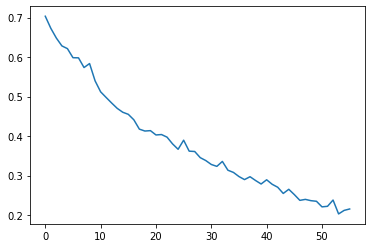

Epoch 1/100
66/66 - 2s - loss: 0.7300 - accuracy: 0.5727 - auc_152: 0.5866 - precision_152: 0.5695 - recall_152: 0.6241 - f1_score: 0.6702 - val_loss: 1.1094 - val_accuracy: 0.5106 - val_auc_152: 0.6202 - val_precision_152: 0.5132 - val_recall_152: 0.9669 - val_f1_score: 0.6798 - 2s/epoch - 37ms/step
Epoch 2/100
66/66 - 1s - loss: 0.6813 - accuracy: 0.5978 - auc_152: 0.6198 - precision_152: 0.6041 - recall_152: 0.5865 - f1_score: 0.6702 - val_loss: 0.6247 - val_accuracy: 0.6766 - val_auc_152: 0.7225 - val_precision_152: 0.6510 - val_recall_152: 0.8017 - val_f1_score: 0.6798 - 962ms/epoch - 15ms/step
Epoch 3/100
66/66 - 1s - loss: 0.6515 - accuracy: 0.6376 - auc_152: 0.6731 - precision_152: 0.6401 - recall_152: 0.6419 - f1_score: 0.6702 - val_loss: 0.6249 - val_accuracy: 0.6383 - val_auc_152: 0.7052 - val_precision_152: 0.6525 - val_recall_152: 0.6364 - val_f1_score: 0.6798 - 935ms/epoch - 14ms/step
Epoch 4/100
66/66 - 1s - loss: 0.6486 - accuracy: 0.6229 - auc_152: 0.6763 - precision_1

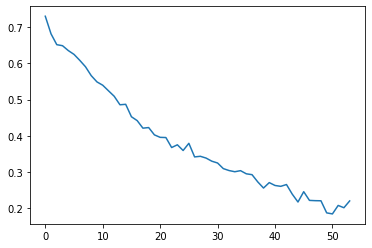

Epoch 1/100
66/66 - 2s - loss: 0.7139 - accuracy: 0.5471 - auc_153: 0.5702 - precision_153: 0.5523 - recall_153: 0.5585 - f1_score: 0.6723 - val_loss: 0.7646 - val_accuracy: 0.5319 - val_auc_153: 0.6538 - val_precision_153: 0.5152 - val_recall_153: 0.8793 - val_f1_score: 0.6610 - 2s/epoch - 35ms/step
Epoch 2/100
66/66 - 1s - loss: 0.6625 - accuracy: 0.6191 - auc_153: 0.6599 - precision_153: 0.6233 - recall_153: 0.6268 - f1_score: 0.6723 - val_loss: 0.9321 - val_accuracy: 0.5191 - val_auc_153: 0.5741 - val_precision_153: 0.5069 - val_recall_153: 0.9483 - val_f1_score: 0.6610 - 840ms/epoch - 13ms/step
Epoch 3/100
66/66 - 1s - loss: 0.6538 - accuracy: 0.6206 - auc_153: 0.6691 - precision_153: 0.6227 - recall_153: 0.6361 - f1_score: 0.6723 - val_loss: 0.7224 - val_accuracy: 0.5489 - val_auc_153: 0.6410 - val_precision_153: 0.5278 - val_recall_153: 0.8190 - val_f1_score: 0.6610 - 860ms/epoch - 13ms/step
Epoch 4/100
66/66 - 1s - loss: 0.6235 - accuracy: 0.6637 - auc_153: 0.7112 - precision_1

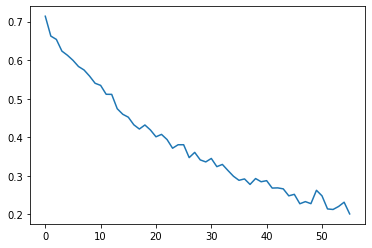

Epoch 1/100
66/66 - 3s - loss: 0.7164 - accuracy: 0.5595 - auc_154: 0.5798 - precision_154: 0.5623 - recall_154: 0.5718 - f1_score: 0.6707 - val_loss: 0.8111 - val_accuracy: 0.5362 - val_auc_154: 0.6116 - val_precision_154: 0.5263 - val_recall_154: 0.9167 - val_f1_score: 0.6761 - 3s/epoch - 41ms/step
Epoch 2/100
66/66 - 1s - loss: 0.6537 - accuracy: 0.6262 - auc_154: 0.6640 - precision_154: 0.6283 - recall_154: 0.6347 - f1_score: 0.6707 - val_loss: 0.6654 - val_accuracy: 0.6383 - val_auc_154: 0.6563 - val_precision_154: 0.6577 - val_recall_154: 0.6083 - val_f1_score: 0.6761 - 930ms/epoch - 14ms/step
Epoch 3/100
66/66 - 1s - loss: 0.6510 - accuracy: 0.6405 - auc_154: 0.6874 - precision_154: 0.6468 - recall_154: 0.6329 - f1_score: 0.6707 - val_loss: 0.7069 - val_accuracy: 0.5830 - val_auc_154: 0.6333 - val_precision_154: 0.5764 - val_recall_154: 0.6917 - val_f1_score: 0.6761 - 859ms/epoch - 13ms/step
Epoch 4/100
66/66 - 1s - loss: 0.6442 - accuracy: 0.6315 - auc_154: 0.6868 - precision_1

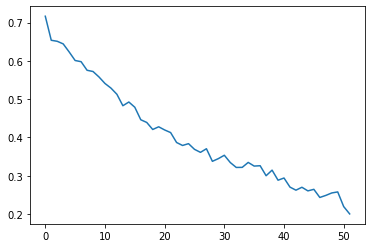

Epoch 1/100
66/66 - 2s - loss: 0.7142 - accuracy: 0.5547 - auc_155: 0.5746 - precision_155: 0.5528 - recall_155: 0.6191 - f1_score: 0.6711 - val_loss: 0.6781 - val_accuracy: 0.6000 - val_auc_155: 0.6513 - val_precision_155: 0.6289 - val_recall_155: 0.5126 - val_f1_score: 0.6723 - 2s/epoch - 36ms/step
Epoch 2/100
66/66 - 1s - loss: 0.6675 - accuracy: 0.6059 - auc_155: 0.6393 - precision_155: 0.6112 - recall_155: 0.6032 - f1_score: 0.6711 - val_loss: 0.7615 - val_accuracy: 0.5660 - val_auc_155: 0.5627 - val_precision_155: 0.5714 - val_recall_155: 0.5714 - val_f1_score: 0.6723 - 850ms/epoch - 13ms/step
Epoch 3/100
66/66 - 1s - loss: 0.6612 - accuracy: 0.6135 - auc_155: 0.6605 - precision_155: 0.6173 - recall_155: 0.6173 - f1_score: 0.6711 - val_loss: 0.6906 - val_accuracy: 0.6000 - val_auc_155: 0.6247 - val_precision_155: 0.6263 - val_recall_155: 0.5210 - val_f1_score: 0.6723 - 880ms/epoch - 13ms/step
Epoch 4/100
66/66 - 1s - loss: 0.6298 - accuracy: 0.6414 - auc_155: 0.6978 - precision_1

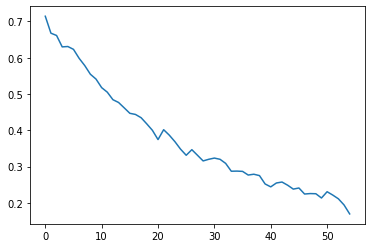

Epoch 1/100
66/66 - 2s - loss: 0.7059 - accuracy: 0.5715 - auc_156: 0.5978 - precision_156: 0.5649 - recall_156: 0.6368 - f1_score: 0.6683 - val_loss: 0.6736 - val_accuracy: 0.5726 - val_auc_156: 0.6796 - val_precision_156: 0.5706 - val_recall_156: 0.8080 - val_f1_score: 0.6964 - 2s/epoch - 35ms/step
Epoch 2/100
66/66 - 1s - loss: 0.6644 - accuracy: 0.6108 - auc_156: 0.6522 - precision_156: 0.6174 - recall_156: 0.5906 - f1_score: 0.6683 - val_loss: 0.6816 - val_accuracy: 0.6154 - val_auc_156: 0.6988 - val_precision_156: 0.5936 - val_recall_156: 0.8880 - val_f1_score: 0.6964 - 819ms/epoch - 12ms/step
Epoch 3/100
66/66 - 1s - loss: 0.6685 - accuracy: 0.6184 - auc_156: 0.6589 - precision_156: 0.6210 - recall_156: 0.6151 - f1_score: 0.6683 - val_loss: 0.7095 - val_accuracy: 0.5940 - val_auc_156: 0.6903 - val_precision_156: 0.5758 - val_recall_156: 0.9120 - val_f1_score: 0.6964 - 874ms/epoch - 13ms/step
Epoch 4/100
66/66 - 1s - loss: 0.6376 - accuracy: 0.6416 - auc_156: 0.6894 - precision_1

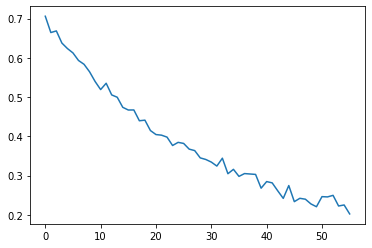

Epoch 1/100
66/66 - 2s - loss: 0.7654 - accuracy: 0.5336 - auc_157: 0.5432 - precision_157: 0.5378 - recall_157: 0.6318 - f1_score: 0.6771 - val_loss: 0.7264 - val_accuracy: 0.6154 - val_auc_157: 0.5693 - val_precision_157: 0.6250 - val_recall_157: 0.3365 - val_f1_score: 0.6154 - 2s/epoch - 35ms/step
Epoch 2/100
66/66 - 1s - loss: 0.6776 - accuracy: 0.5928 - auc_157: 0.6165 - precision_157: 0.5993 - recall_157: 0.6170 - f1_score: 0.6771 - val_loss: 0.7114 - val_accuracy: 0.5256 - val_auc_157: 0.6395 - val_precision_157: 0.4785 - val_recall_157: 0.7500 - val_f1_score: 0.6154 - 921ms/epoch - 14ms/step
Epoch 3/100
66/66 - 1s - loss: 0.6552 - accuracy: 0.6198 - auc_157: 0.6600 - precision_157: 0.6321 - recall_157: 0.6152 - f1_score: 0.6771 - val_loss: 0.6450 - val_accuracy: 0.6111 - val_auc_157: 0.6709 - val_precision_157: 0.5596 - val_recall_157: 0.5865 - val_f1_score: 0.6154 - 853ms/epoch - 13ms/step
Epoch 4/100
66/66 - 1s - loss: 0.6490 - accuracy: 0.6241 - auc_157: 0.6750 - precision_1

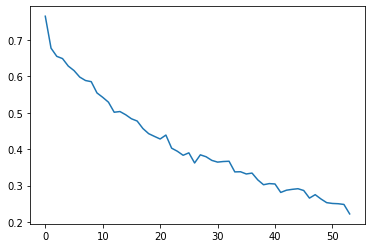

Epoch 1/100
66/66 - 2s - loss: 0.7135 - accuracy: 0.5587 - auc_158: 0.5784 - precision_158: 0.5587 - recall_158: 0.5944 - f1_score: 0.6704 - val_loss: 0.8943 - val_accuracy: 0.5342 - val_auc_158: 0.5723 - val_precision_158: 0.5285 - val_recall_158: 0.8500 - val_f1_score: 0.6780 - 2s/epoch - 34ms/step
Epoch 2/100
66/66 - 1s - loss: 0.6515 - accuracy: 0.6255 - auc_158: 0.6686 - precision_158: 0.6288 - recall_158: 0.6282 - f1_score: 0.6704 - val_loss: 0.7323 - val_accuracy: 0.5342 - val_auc_158: 0.5937 - val_precision_158: 0.5374 - val_recall_158: 0.6583 - val_f1_score: 0.6780 - 904ms/epoch - 14ms/step
Epoch 3/100
66/66 - 1s - loss: 0.6482 - accuracy: 0.6307 - auc_158: 0.6770 - precision_158: 0.6346 - recall_158: 0.6310 - f1_score: 0.6704 - val_loss: 0.6652 - val_accuracy: 0.6325 - val_auc_158: 0.6695 - val_precision_158: 0.6000 - val_recall_158: 0.8500 - val_f1_score: 0.6780 - 968ms/epoch - 15ms/step
Epoch 4/100
66/66 - 1s - loss: 0.6184 - accuracy: 0.6629 - auc_158: 0.7177 - precision_1

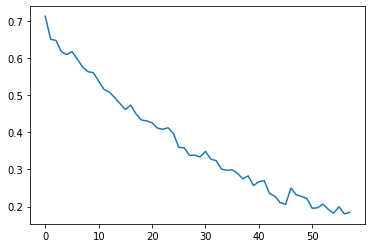

Epoch 1/100
66/66 - 3s - loss: 0.7180 - accuracy: 0.5374 - auc_159: 0.5552 - precision_159: 0.5350 - recall_159: 0.5781 - f1_score: 0.6671 - val_loss: 0.8145 - val_accuracy: 0.5299 - val_auc_159: 0.6754 - val_precision_159: 0.5425 - val_recall_159: 0.8984 - val_f1_score: 0.7072 - 3s/epoch - 43ms/step
Epoch 2/100
66/66 - 1s - loss: 0.6640 - accuracy: 0.6217 - auc_159: 0.6561 - precision_159: 0.6192 - recall_159: 0.6339 - f1_score: 0.6671 - val_loss: 0.7099 - val_accuracy: 0.6325 - val_auc_159: 0.6392 - val_precision_159: 0.7143 - val_recall_159: 0.5469 - val_f1_score: 0.7072 - 823ms/epoch - 12ms/step
Epoch 3/100
66/66 - 1s - loss: 0.6584 - accuracy: 0.6269 - auc_159: 0.6614 - precision_159: 0.6325 - recall_159: 0.6074 - f1_score: 0.6671 - val_loss: 0.6582 - val_accuracy: 0.5855 - val_auc_159: 0.6787 - val_precision_159: 0.6824 - val_recall_159: 0.4531 - val_f1_score: 0.7072 - 854ms/epoch - 13ms/step
Epoch 4/100
66/66 - 1s - loss: 0.6433 - accuracy: 0.6259 - auc_159: 0.6822 - precision_1

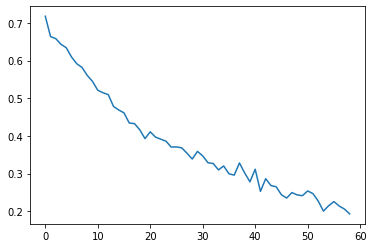

In [88]:
acc = 0.0
for train_index, val_index in kf.split(body_X):
    body_X_train, body_X_val = body_X[train_index], body_X[val_index]
    face_X_train, face_X_val = face_X[train_index], face_X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    rcnn_binary_latefusion_model = RCNN(body_features, face_features, n_length, n_outputs, fusion=True)
    history = rcnn_binary_latefusion_model.trainFusioned(body_X_train, face_X_train, y_train, body_X_val, face_X_val, y_val, epochs=epochs, batch_size=32)
    plt.plot(history.history['loss'])
    plt.show()
    if history.history['accuracy'][-1] > acc:
        acc = history.history['accuracy'][-1]
        rcnn_binary_latefusion_model.save(model_path / 'late_binary_rcnn.h5')

In [89]:
rcnn_binary_latefusion_model = load_model(model_path / 'late_binary_rcnn.h5')
y_pred = rcnn_binary_latefusion_model.predict([body_X_test, face_X_test])
_, acc, auc, precision, recall, f1 = rcnn_binary_latefusion_model.evaluate([body_X_test, face_X_test], y_test)
rnn_auc.append(round(auc, 2))
print('Accuracy: {:.2f}% \nROC/AUC: {:.2f} \nPrecision: {:.2f} \nRecall: {:.2f} \nF1 score: {:.2f}'.format(acc * 100, auc, precision, recall, f1))

8/8 [==============================] - 0s 7ms/step - loss: 0.6142 - accuracy: 0.6471 - auc_155: 0.7063 - precision_155: 0.9155 - recall_155: 0.6436 - f1_score: 0.9182
Accuracy: 64.71% 
ROC/AUC: 0.71 
Precision: 0.92 
Recall: 0.64 
F1 score: 0.92


### Ensemble

In [90]:
class KerasMember():
    def __init__(self, name=None, keras_model=None, train_batches=None,
                 val_batches=None, submission_probs=None, keras_modelpath=None,
                 keras_kwargs={}):
        assert(name is not None)
        self.name = name
        self.model = keras_model
        self.submission_probs = submission_probs
        # Initialize Params
        self.val_probs = None
        self.train_probs = None
        self.val_classes = None
        self.train_classes = None
        if (keras_model is None) and (keras_modelpath is not None):
            self.load_kerasmodel(self.keras_modelpath, self.keras_kwargs)
        if train_batches is not None:
            self._calculate_train_predictions(train_batches)
        if val_batches is not None:
            self._calculate_val_predictions(val_batches)

    def _test_datatuple(self, datatuple):
        assert(len(datatuple) == 2)
        assert(datatuple[0].shape[0] == datatuple[1].shape[0])

    def _calculate_predictions(self, batches):
        if hasattr(batches, 'shuffle'):
            batches.reset()
            batches.shuffle = False
        if type(batches) is tuple:
            self._test_datatuple(batches)
            return self.model.predict(batches[0])
        return self.model.predict_generator(
            batches, steps=(batches.n // batches.batch_size) + 1, verbose=1)

    def _calculate_val_predictions(self, val_batches):
        if type(val_batches) is tuple:
            self.val_classes = val_batches[1]
        elif hasattr(val_batches, 'classes'):
            self.val_classes = np.array(val_batches.classes)
        elif hasattr(val_batches, 'y'):
            self.val_classes = np.array(val_batches.y)
        else:
            raise ValueError("No known class in data batch")
        self.val_probs = self._calculate_predictions(val_batches)
        return self.val_probs

    def _calculate_train_predictions(self, train_batches):
        if type(train_batches) is tuple:
            self.train_classes = train_batches[1]
        elif hasattr(train_batches, 'classes'):
            self.train_classes = np.array(train_batches.classes)
        elif hasattr(train_batches, 'y'):
            self.train_classes = np.array(train_batches.y)
        else:
            raise ValueError("No known class in data batch")
        self.train_probs = self._calculate_predictions(train_batches)
        return self.train_probs


def _calculate_metric(y_true, y_pred, metric=None):
    if metric is None:
        metric = roc_auc_score
    y_t = y_true
    y_p = y_pred
    if metric == roc_auc_score:
        return metric(y_t, y_p, multi_class='ovo')
    if y_true.ndim > 1:
        y_t = np.argmax(y_true, axis=1)
    if y_pred.ndim > 1:
        y_p = np.argmax(y_pred, axis=1)
    if metric is precision_recall_fscore_support:
        return precision_recall_fscore_support(y_t, y_p, average='macro')
    return metric(y_t, y_p)

class DirichletEnsemble():
    def __init__(self, N=10000, metric=None, maximize=True):
        self.n = N
        self.metric = metric
        if metric is None:
            self.metric = roc_auc_score
        self.maximize = maximize
        # Initialize Parameters:
        self.members = []
        self.bestweights = []
        self.probabilities = None
        self._nmembers = 0
        self.bestscore = float("-inf") if maximize else float("inf")
        self.accuracy = None
        self.precision = None
        self.recall = None
        self.f1 = None
        self.fitted = False

    def add_members(self, members):
        for member in members:
            self.add_member(member)

    def add_member(self, member):
        self.members.append(member)
        self._nmembers += 1

    def fit(self, verbose=False):
        assert(len(self.members) > 1)
        val_classes = self.members[0].val_classes
        best_ensemble_score = float("-inf") if self.maximize else float("inf")
        best_ensemble_accuracy = 0
        best_ensemble_p = 0
        best_ensemble_r = 0
        best_ensemble_f1 = 0
        rsbest = None
        for i in range(self.n):
            rs = np.random.dirichlet(np.ones(self._nmembers), size=1)[0]
            preds = np.sum(np.array([self.members[i].val_probs * rs[i]
                                     for i in range(self._nmembers)]), axis=0)
            ensemble_score = _calculate_metric(val_classes, preds)
            ensemble_accuracy = _calculate_metric(val_classes, preds, accuracy_score)
            ensemble_prf1 = _calculate_metric(val_classes, preds, precision_recall_fscore_support)
            ensemble_p = ensemble_prf1[0]
            ensemble_r = ensemble_prf1[1]
            ensemble_f1 = ensemble_prf1[2]
            max_flag = self.maximize and ensemble_score > best_ensemble_score
            min_flag = not(
                self.maximize) and ensemble_score < best_ensemble_score
            if max_flag or min_flag:
                if verbose:
                    print(ensemble_score, i, rs) 
                best_ensemble_score = ensemble_score
                rsbest = rs
            if ensemble_accuracy > best_ensemble_accuracy:
                if verbose:
                    print(ensemble_accuracy, i, rs) 
                best_ensemble_accuracy = ensemble_accuracy
            if ensemble_p > best_ensemble_p:
                if verbose:
                    print(ensemble_p, i, rs) 
                best_ensemble_p = ensemble_p
            if ensemble_r > best_ensemble_r:
                if verbose:
                    print(ensemble_r, i, rs) 
                best_ensemble_r = ensemble_r
            if ensemble_f1 > best_ensemble_f1:
                if verbose:
                    print(ensemble_f1, i, rs) 
                best_ensemble_f1 = ensemble_f1
        self.bestweights = rsbest
        self.bestscore = best_ensemble_score
        self.accuracy = best_ensemble_accuracy
        self.precision = best_ensemble_p
        self.recall = best_ensemble_r
        self.f1 = best_ensemble_f1

    def predict(self):
        self.probabilities = np.sum(np.array([self.bestweights[i] *
                                              self.members[i].submission_probs
                                              for i in range(self._nmembers)]),
                                    axis=0)
        return self.probabilities
        
    def describe(self):
        for i in range(self._nmembers):
            member = self.members[i]
            text = member.name + " (weight: {:1.4f})".format(self.bestweights[i])
            print(text)
        print("Accuracy: {:1.2f}% - ROC/AUC: {:1.2f} - Precision: {:1.2f} - Recall: {:1.2f} - F1 score: {:1.2f}".format(
            self.accuracy * 100, self.bestscore, self.precision, self.recall, self.f1))
        return self.bestscore

In [91]:
cnnlstm_body_member = KerasMember(name="CNN + Bidirectional LSTM Body Model", keras_model=cnnlstm_binary_body_model, train_batches=(body_X_train, y_train), val_batches=(body_X_test, body_y_test))
rcnn_body_member = KerasMember(name="RCNN Body Model", keras_model=rcnn_binary_body_model, train_batches=(body_X_train, y_train), val_batches=(body_X_test, body_y_test))
cnnlstm_face_member = KerasMember(name="CNN + Bidirectional LSTM Face Model", keras_model=cnnlstm_binary_face_model, train_batches=(face_X_train, y_train), val_batches=(face_X_test, face_y_test))
rcnn_face_member = KerasMember(name="RCNN Face Model", keras_model=rcnn_binary_face_model, train_batches=(face_X_train, y_train), val_batches=(face_X_test, face_y_test))

In [92]:
dirichletEnsemble = DirichletEnsemble()
dirichletEnsemble.add_member(cnnlstm_body_member)
dirichletEnsemble.add_member(rcnn_body_member)
dirichletEnsemble.add_member(cnnlstm_face_member)
dirichletEnsemble.add_member(rcnn_face_member)
dirichletEnsemble.fit()

In [93]:
e = dirichletEnsemble.describe()
cnn_auc.append(round(e, 2))
rnn_auc.append(0)

CNN + Bidirectional LSTM Body Model (weight: 0.0055)
RCNN Body Model (weight: 0.9449)
CNN + Bidirectional LSTM Face Model (weight: 0.0388)
RCNN Face Model (weight: 0.0109)
Accuracy: 100.00% - ROC/AUC: 0.71 - Precision: 1.00 - Recall: 1.00 - F1 score: 1.00


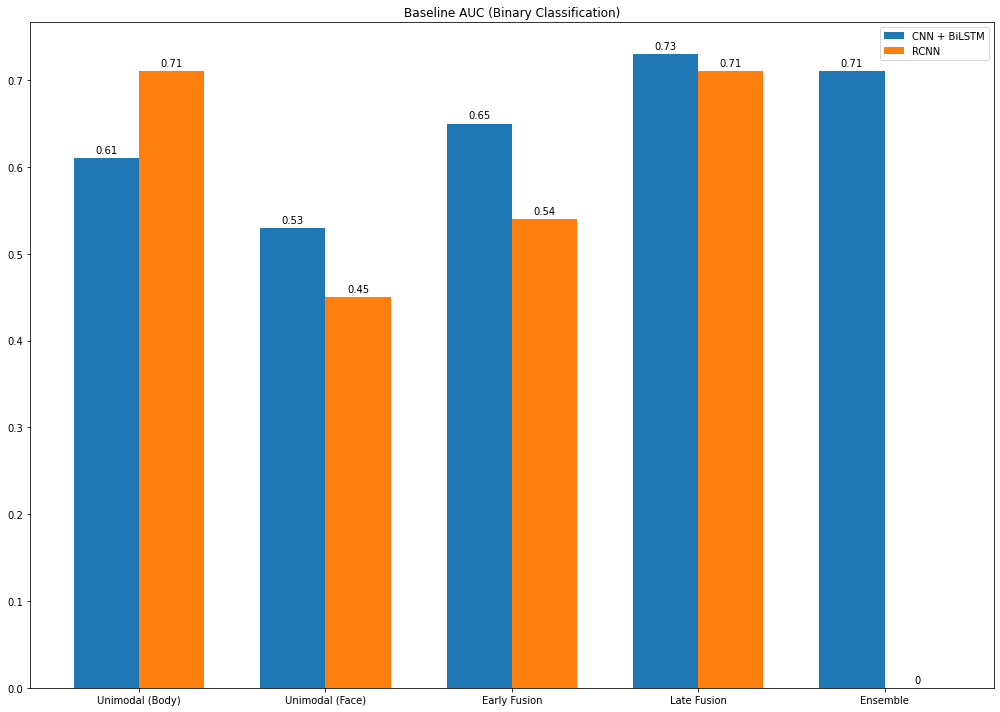

In [94]:
labels = ['Unimodal (Body)', 'Unimodal (Face)', 'Early Fusion', 'Late Fusion', 'Ensemble']

x = np.arange(len(labels)) 
width = 0.35 

fig, ax = plt.subplots(figsize=(14, 10))
rects1 = ax.bar(x - width/2, cnn_auc, width, label='CNN + BiLSTM')
rects2 = ax.bar(x + width/2, rnn_auc, width, label='RCNN')

ax.set_title('Baseline AUC (Binary Classification)')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()